# Projet Machine Learning - Riot Team Fight Tactics


Riot Team Fight Tactics (TFT) est un jeu en ligne de strategie développé par Riot Games. Je joue régulièrement à ce jeu depuis plusieurs mois et j'ai voulu porter mon projet de Machine Learning sur celui-ci. J'ai trouvé un ensemble de jeu de données sur Kaggle regroupant les résultats sur 50000 parties.

## Qu'est ce que Team Fight Tactics (TFT) ?

Avant de commencer à travailler sur les données je vais vous présenter les grandes lignes de TFT. 

Il s'agit d'un jeu de stratégie où 8 joueurs s'affrontent tour par tour en duel. Chaque joueur construit une équipe au fil de la partie qu'il dispose sur le terrain de jeu. Le terrain de jeu est composé d'un ensemble de case où le joueur peut placer ses Champions (le terrain est coupé horizontalement et chaque joueur place son équipe sur la partie inférieure du terrain). Chaque joueur dispose d'une jauge de vie de 100 points et la partie d'un joueur se termine quand sa jauge est à 0. Une défaite fait perdre au joueur de la vie et à contrario, une victoire ne lui en retire pas. Enfin chaque joueur affronte un à un les joueurs de la partie tant que sa jauge n'a pas atteint 0.

Comme vous l'avez sûrement compris, la meilleure équipe vaincra ! Pour composer une équipe qui remportera le plus de duel, le joueur peut acheter des Champions et équiper jusqu'à trois objets sur eux pour les rendre plus fort. Chaque joueur dispose d'un niveau propre à la partie, allant de 1 à 9. Le nombre de Champion qu'un joueur peut placer sur le terrain est égal à ce niveau (niveau 4 : 4 Champions sur le terrain). Pour obtenir des Champions, il y a un marché qui s'actualise à chaque combat ou alors que l'on peut actualiser pour des pièces d'or (PO) et qui propose des exemplaires de Champion(1 étoile, j'explique par la suite cette notion). L'apparition d'un champion dans le marché suit une loi de probabilité propre au niveau du joueur. Il y a 5 qualités de Champions allant de 1 à 5 (qui coûtent respectivement 1PO à 5PO), plus le joueur est haut niveau plus la probabilité d'obtenir des Champions de qualité élevé dans le marché augmente. 

Pour terminer concernant les Champions, chaque Champion possède une force évalué par des étoiles. La force d'un Champion peut aller de 1 étoile à 3 étoiles. Pour obtenir un Champion 2 étoiles, il faut acheter 3 exemplaires de ce Champions 1 étoile et pour obtenir un champion 3 étoiles, il faut acheter 9 exemplaires de ce Champions 1 étoile (c'est à dire construire 3 exemplaires 2 étoiles de ce Champion). Pour ce faire, chaque joueur dispose d'un banc où il peut stocker jusqu'à 9 Champions.

Enfin, et certainement le plus important, les combinaisons de Champions. Chaque Champion possède entre 2 et 3 classes attitrés. Les classes permettent d'obtenir des bonus variés qui augmente grandement la force d'une équipe. Chaque classe possède un palier pour débloquer un bonus (par exemple la classe Cybernetic possède deux paliers, à 3 et 6 Champions de cette classe). Pour rendre le jeu encore plus intéressant, il faut savoir que les paliers des classes peuvent nécessiter l'obtention de Champions de qualité 5, il faut donc vite monter de niveau pour les obtenir. Toute la stratégie de TFT réside dans les synergies entre les différentes classes pour rendre son équipe imbattable.

Pour terminer sur les synergies, il faut savoir aussi qu'un nombre limité d'exemplaire de chaque Champion est disponible. Il faut donc faire attention aux synergies jouées par ses adversaires, si plusieurs joueurs jouent la même synergie alors il est fort probable qu'un d'eux se retrouve sans les exemplaires de Champion dont il a besoin (c'est ce qu'on appelle dans le jargon, se faire 'trader'). Pour terminer chaque il existe des synergies qui contre d'autres synergies, par exemple une synergie avec des Champions faisant des dégats magique peut se faire contrer par une synergie qui procure de grand bonus en défense magique (c'est ce qu'on appelle dans le jargon, se faire 'counter'). 

Mais où est le combat dans tout ça ? TFT est un jeu de stratégie, il faut donc placer ingénieusement ses Champions sur le terrain parceque ceux-ci attaque de façon automatique la personne la plus proche. Chaque attaque génère du mana qui permet de lancer le sort du Champion (automatiquement aussi) quand le mana nécessaire est atteint.

Pour finir sur la présentation du jeu, il faut savoir que les joueurs arrivant dans le Top 4 de la partie ne perdent pas de points de classement à contrario, ceux arrivant de 5ème à 8ème perdent des points de classement. 

Pour mieux visualiser tout cela, voici une capture d'écran du jeu au cours d'une partie : 

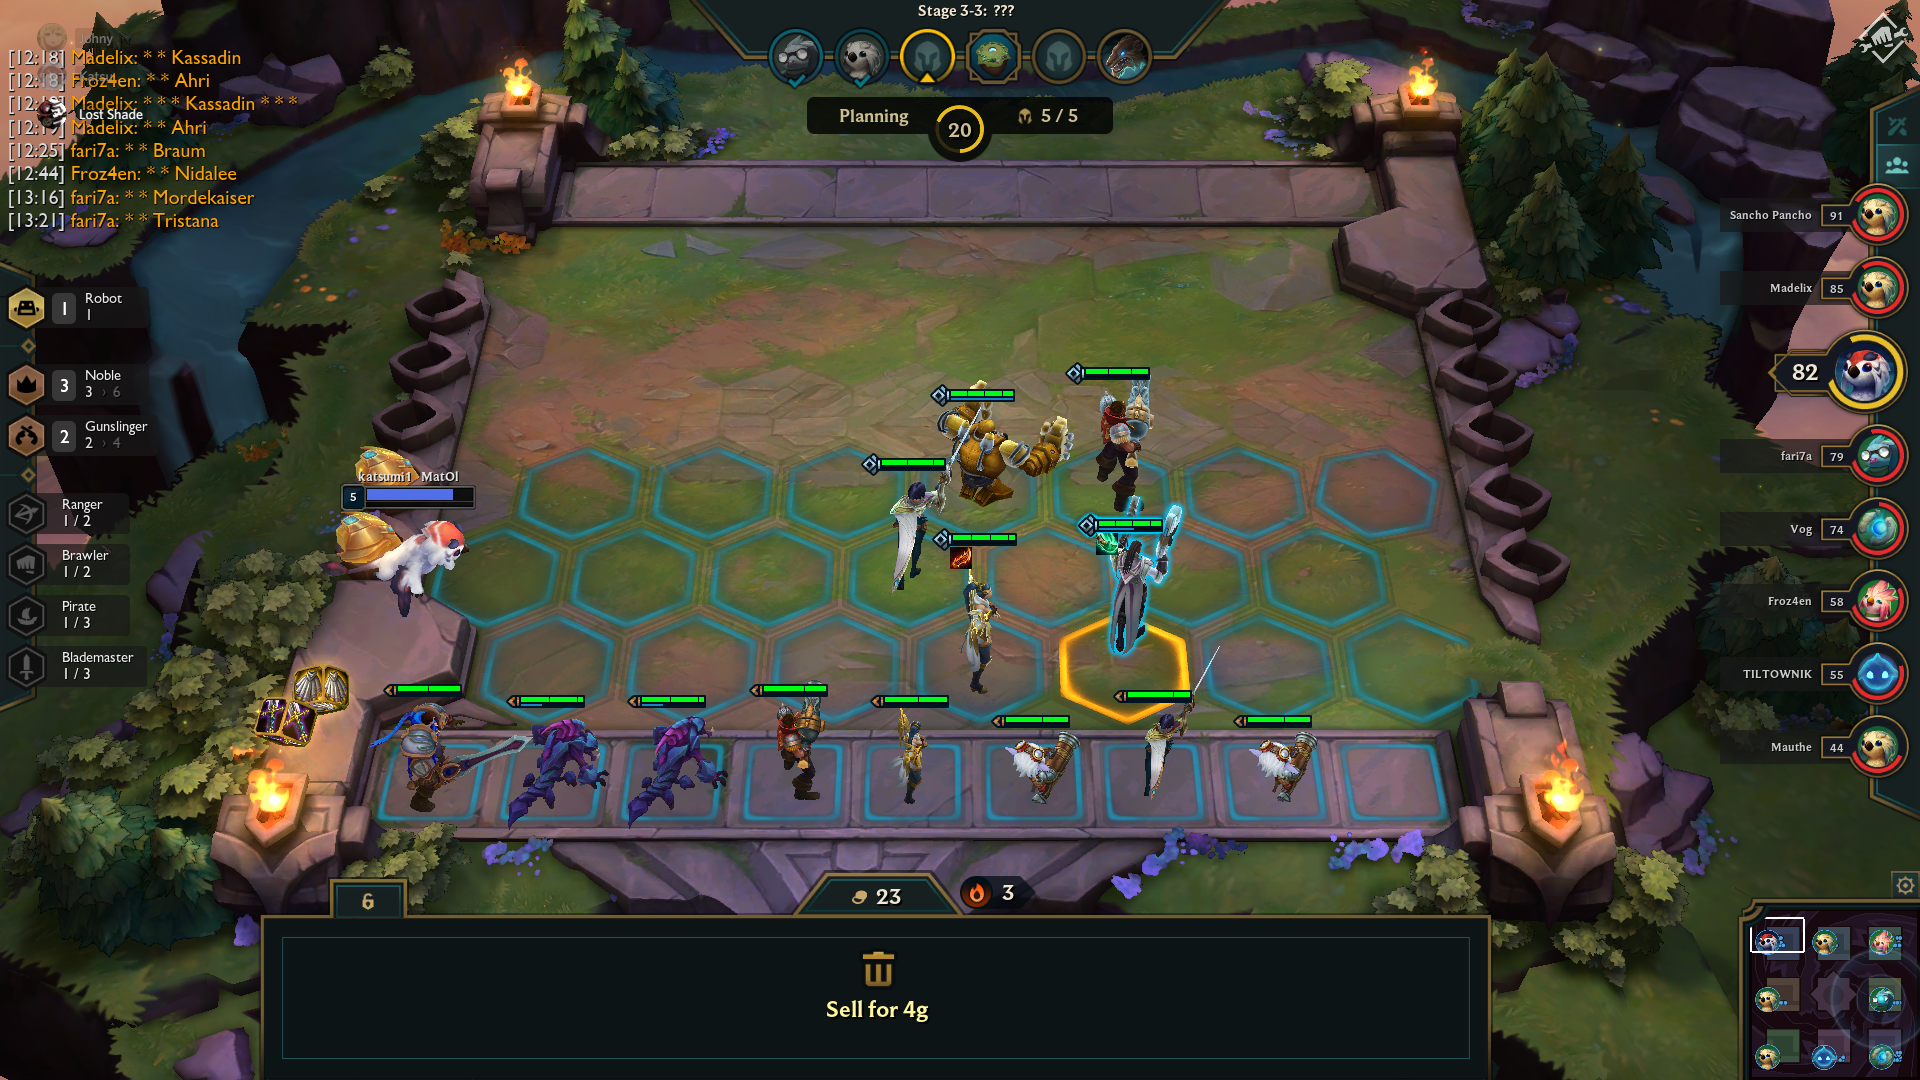

Sur le bord gauche de l'image on peut observer la synergie de l'équipe; quand une classe est en bronze, argent ou doré cela veut dire que respectivement le palier 1, 2 et 3 ont été atteint, et quand il n'y a pas de couleur cela indique le nombre de Champions manquant pour obtenir le premier palier (exemple 1/3, il manque 2 Champions).

Sur le bord droit de l'image on peut obersver la vie de chacun des joueurs dans la partie. Et en bas à droite on peut aller voir les équipes des adversaires (pour essayer de comprendre leurs synergies et de les battre).

Sur le bord inférieur se situe le marché où on peut acheter les exemplaires 1 étoile des champions, on peut voir sur la partie haute à gauche les probabilités d'apparition des qualités des Champions et notre niveau actuel).

## Quelles sont les données à disposition ? 

Je vous ai présenté les grandes lignes du jeu pour comprendre les principaux enjeux stratégique de TFT et mieux appréhender les données à disposition. On dispose des résultats d'environs 50000 parties, 10000 parties pour chaque palier de classement des joueurs (Challenger, Grand Maitre, Maitre, Diamant et Platine). On va cependant étudier les différents palier de classement séparemment.

Pour chaque partie on dispose des informations sur les 8 joueurs à la fin de la partie. On retrouve le niveau du joueur (1 à 9), le temps de jeu, les synergies, les Champions (force en étoile et objets portés), l'identifiant de la partie (qui peut nous servir pour observer les 'trade' et 'counter' dont on a parlé plus haut) et enfin le rang (1er à 8ème). On peut déjà remarquer qu'on ne dispose pas du placement des champions sur le terrain, on y reviendra dans la suite.

##### On va essayer au cours de ce projet de prédire le rang des joueurs à partir des informations de fin de partie à notre disposition.

In [1]:
# Importation des librairies pour le projet

import pandas as pd
import numpy as np
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Premier coup d'oeil sur le jeu de données

In [3]:
# Liste des fichiers de données à disposition contenant les informations sur les parties :
for dirname, _, filenames in os.walk('input/data_match'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/data_match/TFT_GrandMaster_MatchData.csv
input/data_match/.DS_Store
input/data_match/TFT_Diamond_MatchData.csv
input/data_match/TFT_Platinum_MatchData.csv
input/data_match/TFT_Challenger_MatchData.csv
input/data_match/TFT_Master_MatchData.csv


On retrouve bien les fichiers pour les 5 paliers de classement dont on a parlé et on va dans cette étude analyser celui des Challenger (les meilleurs des meilleurs !). On retrouve les différents informations dont on a parlé plus haut, la variable que l'on veut prédir est donc 'Ranked'.

In [4]:
challenger_data_filepath = 'input/data_match/TFT_Challenger_MatchData.csv'
list_df = [pd.read_csv(challenger_data_filepath)]
tft_df = pd.concat(list_df)
tft_df = tft_df[tft_df['Ranked'] > 0]
tft_df.reset_index(drop=True, inplace=True)
tft_df.head()

gameId  gameDuration  level  lastRound  Ranked  ingameDuration  \
0  KR_4247538593   2142.470703      8         35       1     2134.272217   
1  KR_4247538593   2142.470703      9         35       2     2134.272217   
2  KR_4247538593   2142.470703      8         34       3     2073.459229   
3  KR_4247538593   2142.470703      8         33       4     1998.146729   
4  KR_4247538593   2142.470703      9         33       5     1986.443237   

                                         combination  \
0  {'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...   
1  {'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...   
2  {'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...   
3  {'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...   
4  {'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...   

                                            champion  
0  {'JarvanIV': {'items': [27], 'star': 3}, 'Sona...  
1  {'Malphite': {'items': [7], 'star': 2}, 'Yasuo...  
2  {'KaiSa': {'items': [99, 2, 23], 'star': 2}, '...  
3  {'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann...  
4  {'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...

On a affiché ci-dessus les 8 première lignes qui correspondent aux 8 joueurs d'une partie. Les variables 'combination' et 'champion' sont des dictionnaires python mais ils sont stockés sous forme de chaine de caractères. On va appliquer une transformation pour évaluer le contenu comme tel. On en profite pour créer une variable binaire 'Top' qui prend 1 pour valeur si le joueur termine dans le Top 4 et 0 sinon (on essaira de prédir cette variable si la prédiction de la variable 'Ranked' n'est pas concluant).

In [5]:
tft_df['combination'] = tft_df['combination'].apply(lambda x: ast.literal_eval(x))
tft_df['champion'] = tft_df['champion'].apply(lambda x: ast.literal_eval(x))
tft_df['Top'] = tft_df['Ranked'].apply(lambda x: 1 if x < 5 else 0)
tft_df.head(8)

gameId  gameDuration  level  lastRound  Ranked  ingameDuration  \
0  KR_4247538593   2142.470703      8         35       1     2134.272217   
1  KR_4247538593   2142.470703      9         35       2     2134.272217   
2  KR_4247538593   2142.470703      8         34       3     2073.459229   
3  KR_4247538593   2142.470703      8         33       4     1998.146729   
4  KR_4247538593   2142.470703      9         33       5     1986.443237   
5  KR_4247538593   2142.470703      8         31       6     1878.470093   
6  KR_4247538593   2142.470703      9         31       7     1866.661499   
7  KR_4247538593   2142.470703      8         28       8     1694.417358   

                                         combination  \
0  {'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...   
1  {'Blaster': 2, 'Mercenary': 1, 'Rebel': 6, 'Se...   
2  {'Cybernetic': 1, 'DarkStar': 3, 'Demolitionis...   
3  {'Blaster': 1, 'Cybernetic': 1, 'DarkStar': 1,...   
4  {'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...   
5  {'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...   
6  {'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...   
7  {'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...   

                                            champion  Top  
0  {'JarvanIV': {'items': [27], 'star': 3}, 'Sona...    1  
1  {'Malphite': {'items': [7], 'star': 2}, 'Yasuo...    1  
2  {'KaiSa': {'items': [99, 2, 23], 'star': 2}, '...    1  
3  {'KaiSa': {'items': [44, 37], 'star': 2}, 'Ann...    1  
4  {'Ziggs': {'items': [], 'star': 1}, 'Yasuo': {...    0  
5  {'Ziggs': {'items': [], 'star': 1}, 'Malphite'...    0  
6  {'Malphite': {'items': [], 'star': 2}, 'Graves...    0  
7  {'Malphite': {'items': [], 'star': 2}, 'Blitzc...    0

Pour mieux comprendre les lignes de la table on va isoler la première ligne pour analyser son contenu. On va regarder le contenu des variables 'combination' et 'champion', les autres sont lisibles ci-dessus (lastRound correspond au dernier round joué par le joueur et les durée sont en secondes).

In [6]:
# On récupère la première ligne
first_line = tft_df.iloc[0].copy()

Commençons par la variable 'combination' qui regroupe le détail de la synergie du joueur à la fin de la partie. Le joueur a joué 6 classes différentes (DarkStar, Protector ... on négligera la compréhension de TemplateTrait car je ne sais pas ce que c'est et je n'ai trouvé aucune information à ce sujet). On remarque que le nombre de champion total est supérieur à 8 (son niveau dans la partie), ce qui est normal puisque les Champions peuvent appartenir à plusieurs classes.

In [7]:
# On affiche le dictionnaire des synergies
first_line_synergie = first_line.combination.copy()
for classe in first_line_synergie.keys():
    print('Classe {} : {} Champions'.format(classe,first_line_synergie.get(classe)))

Classe DarkStar : 2 Champions
Classe Protector : 4 Champions
Classe Rebel : 1 Champions
Classe Set3_Celestial : 3 Champions
Classe Set3_Mystic : 4 Champions
Classe StarGuardian : 2 Champions
Classe TemplateTrait : 1 Champions


Même travail sur la variable 'champion' qui regroupe le détail des Champions. Le joueur a joué les 8 champions listés ci-dessous (Jarvan IV, Sona ...), on remarque que 4 des Champions sont 3 étoiles et que le Champions XinZhao porte 3 objets (objet 69 et deux objets 25).

In [8]:
# On affiche le dictionnaire des champions
first_line_champion = first_line.champion.copy()
for champion in first_line_champion.keys():
    print('Champion {} {} étoiles, liste des objets : {} '.format(champion,
                                                               first_line_champion.get(champion).get('star'),
                                                               first_line_champion.get(champion).get('items')))

Champion JarvanIV 3 étoiles, liste des objets : [27] 
Champion Sona 3 étoiles, liste des objets : [46] 
Champion Rakan 3 étoiles, liste des objets : [37, 69] 
Champion XinZhao 3 étoiles, liste des objets : [69, 25, 25] 
Champion Neeko 2 étoiles, liste des objets : [] 
Champion Karma 2 étoiles, liste des objets : [] 
Champion Soraka 2 étoiles, liste des objets : [] 
Champion Lulu 1 étoiles, liste des objets : [59] 


Avant de compléter les données avec des informations extérieurs (paliers des classes, trade, counter ...), on va retravailler notre table pour que les variables 'combination' et 'champion' ne soit plus sous forme de dictionnaire et on va faire une analyse descriptive de son contenu. 

### Nettoyage et analyse des données  

Pour commencer on va transformer la variable 'combination', pour cela on va créer un DataFrame contenant une colonne pour chaque classe. Chaque colonne prendra alors une valeur égale au nombre de Champions de cette classe joué par un joueur dans sa partie (0 si le joueur ne joue pas la classe). On va aussi en profiter pour isoler la liste des classes présentes dans le jeux (il y en a 23 plus la classe TemplateTrait dont j'ai parlé plus haut).

In [9]:
# Transformation de la colonne combination en DataFrame
team_comp_column = tft_df['combination']
team_comp_dict = team_comp_column.copy().to_dict()

team_comp_df = pd.DataFrame(team_comp_dict).fillna(0).T

# On sauvegarde la liste des classes présentes
distinct_classes = np.array(team_comp_df.columns)

team_comp_df.head(8)

DarkStar  Protector  Rebel  Set3_Celestial  Set3_Mystic  StarGuardian  \
0       2.0        4.0    1.0             3.0          4.0           2.0   
1       0.0        0.0    6.0             0.0          2.0           1.0   
2       3.0        0.0    0.0             0.0          1.0           0.0   
3       1.0        0.0    0.0             0.0          0.0           0.0   
4       0.0        0.0    6.0             1.0          2.0           0.0   
5       0.0        0.0    6.0             0.0          1.0           0.0   
6       0.0        0.0    2.0             0.0          0.0           0.0   
7       0.0        0.0    2.0             0.0          0.0           0.0   

   TemplateTrait  Blaster  Mercenary  Set3_Blademaster  ...  Demolitionist  \
0            1.0      0.0        0.0               0.0  ...            0.0   
1            0.0      2.0        1.0               3.0  ...            0.0   
2            0.0      0.0        0.0               0.0  ...            1.0   
3            1.0      1.0        2.0               0.0  ...            2.0   
4            0.0      2.0        2.0               2.0  ...            2.0   
5            0.0      2.0        2.0               2.0  ...            2.0   
6            0.0      4.0        1.0               0.0  ...            1.0   
7            1.0      4.0        1.0               0.0  ...            0.0   

   Infiltrator  MechPilot  Set3_Sorcerer  SpacePirate  Chrono  Set3_Void  \
0          0.0        0.0            0.0          0.0     0.0        0.0   
1          0.0        0.0            0.0          0.0     0.0        0.0   
2          4.0        3.0            2.0          0.0     0.0        0.0   
3          4.0        3.0            1.0          1.0     0.0        0.0   
4          0.0        0.0            0.0          1.0     0.0        0.0   
5          0.0        0.0            0.0          1.0     0.0        0.0   
6          0.0        0.0            0.0          2.0     2.0        1.0   
7          0.0        0.0            0.0          0.0     2.0        1.0   

   Sniper  Vanguard  ManaReaver  
0     0.0       0.0         0.0  
1     0.0       0.0         0.0  
2     0.0       0.0         0.0  
3     0.0       0.0         0.0  
4     0.0       0.0         0.0  
5     0.0       0.0         0.0  
6     0.0       0.0         0.0  
7     0.0       0.0         0.0  

[8 rows x 24 columns]

On fait le même travail pour la variable 'champion' mais on va générer un DataFrame, un pour les étoiles et un pour les objets du Champion. On va également en profiter pour isoler la liste des Champions présents dans le jeux (il y en a 52). On retrouve bien sur les deux DataFrame ci-dessous les informations concernant la première ligne, à savoir par exemple le Champion XinZhao 3 étoiles et qu'il porte un item 69 et 2 item 25. On rajoute également dans le DataFrame sur les étoiles le cumul d'étoile et le nombre de Champion de l'équipe et pour le DataFrame sur les objets, on rajoute une variable avec le nombre d'objet total sur l'équipe. 

In [10]:
# Transformation de la colonne combination en deux DataFrame
team_champ_column = tft_df['champion']
team_champ_dict = team_champ_column.copy().to_dict()

# DataFrame pour les étoiles
team_champ_star_dict = dict()
for key_index in team_champ_dict.keys():
    team = team_champ_dict.get(key_index)
    team_champ_star_dict[key_index] = {key:team.get(key).get('star') for key in team.keys()}

team_champ_star_df = pd.DataFrame(team_champ_star_dict).fillna(0).T

# On sauvegarde la liste des champions présents
distinct_champions = np.array(team_champ_star_df.columns)

team_champ_star_df['score_star'] = team_champ_star_df.sum(axis=1) 
team_champ_star_df['nombre_champ'] = (team_champ_star_df > 0).sum(axis=1)

team_champ_star_df.head(8)

JarvanIV  Sona  Rakan  XinZhao  Neeko  Karma  Soraka  Lulu  Malphite  \
0       3.0   3.0    3.0      3.0    2.0    2.0     2.0   1.0       0.0   
1       0.0   2.0    0.0      0.0    0.0    0.0     2.0   0.0       2.0   
2       0.0   0.0    0.0      0.0    0.0    2.0     0.0   0.0       0.0   
3       0.0   0.0    0.0      0.0    0.0    0.0     0.0   0.0       0.0   
4       0.0   1.0    0.0      0.0    0.0    0.0     0.0   2.0       0.0   
5       0.0   2.0    0.0      0.0    0.0    0.0     0.0   0.0       2.0   
6       0.0   0.0    0.0      0.0    0.0    0.0     0.0   0.0       2.0   
7       0.0   0.0    0.0      0.0    0.0    0.0     0.0   0.0       2.0   

   Yasuo  ...  Syndra  Zoe  VelKoz  Shen  Darius  Caitlyn  TwistedFate  \
0    0.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
1    2.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
2    0.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
3    0.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
4    1.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
5    2.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
6    0.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   
7    0.0  ...     0.0  0.0     0.0   0.0     0.0      0.0          0.0   

   Xerath  score_star  nombre_champ  
0     0.0        19.0             9  
1     0.0        16.0            10  
2     0.0        16.0             9  
3     0.0        14.0             9  
4     0.0        13.0            10  
5     0.0        13.0             9  
6     0.0        17.0            10  
7     0.0        13.0             9  

[8 rows x 54 columns]

In [12]:
team_champ_items_dict = dict()
for key_index in team_champ_dict.keys():
    team = team_champ_dict.get(key_index)
    champ_item_dict = dict()
    for key in team.keys():
        for item in team.get(key).get('items'):
            try:
                champ_item_dict[str(key + '_item' + str(item))] += 1 
            except KeyError:
                champ_item_dict[str(key + '_item' + str(item))] = 1 
                
    team_champ_items_dict[key_index] = champ_item_dict

team_champ_items_df = pd.DataFrame(team_champ_items_dict).fillna(0).T

team_champ_items_df['score_items'] = team_champ_items_df.sum(axis=1)

team_champ_items_df.head(8)

JarvanIV_item27  Sona_item46  Rakan_item37  Rakan_item69  XinZhao_item69  \
0              1.0          1.0           1.0           1.0             1.0   
1              0.0          0.0           0.0           0.0             0.0   
2              0.0          0.0           0.0           0.0             0.0   
3              0.0          0.0           0.0           0.0             0.0   
4              0.0          0.0           0.0           0.0             0.0   
5              0.0          0.0           0.0           0.0             0.0   
6              0.0          0.0           0.0           0.0             0.0   
7              0.0          0.0           0.0           0.0             0.0   

   XinZhao_item25  Lulu_item59  Malphite_item7  Yasuo_item99  Yasuo_item22  \
0             2.0          1.0             0.0           0.0           0.0   
1             0.0          0.0             1.0           1.0           1.0   
2             0.0          0.0             0.0           0.0           0.0   
3             0.0          0.0             0.0           0.0           0.0   
4             0.0          0.0             0.0           0.0           0.0   
5             0.0          0.0             0.0           0.0           0.0   
6             0.0          0.0             0.0           0.0           0.0   
7             0.0          0.0             0.0           0.0           0.0   

   ...  Malphite_item46  Ziggs_item25  TwistedFate_item78  Ziggs_item5  \
0  ...              0.0           0.0                 0.0          0.0   
1  ...              0.0           0.0                 0.0          0.0   
2  ...              0.0           0.0                 0.0          0.0   
3  ...              0.0           0.0                 0.0          0.0   
4  ...              0.0           0.0                 0.0          0.0   
5  ...              0.0           0.0                 0.0          0.0   
6  ...              0.0           0.0                 0.0          0.0   
7  ...              0.0           0.0                 0.0          0.0   

   Ziggs_item8  Caitlyn_item77  Caitlyn_item58  Caitlyn_item55  \
0          0.0             0.0             0.0             0.0   
1          0.0             0.0             0.0             0.0   
2          0.0             0.0             0.0             0.0   
3          0.0             0.0             0.0             0.0   
4          0.0             0.0             0.0             0.0   
5          0.0             0.0             0.0             0.0   
6          0.0             0.0             0.0             0.0   
7          0.0             0.0             0.0             0.0   

   TwistedFate_item8  score_items  
0                0.0          8.0  
1                0.0         12.0  
2                0.0         10.0  
3                0.0         10.0  
4                0.0          9.0  
5                0.0          7.0  
6                0.0          7.0  
7                0.0          8.0  

[8 rows x 2757 columns]

On va consolider les différents DataFrame pour obtenir notre jeu de données propre. On retire de celui-ci les variables 'combination' et 'champion' puisqu'on ne va pas les utiliser.

In [13]:
list_df = [tft_df,team_comp_df,team_champ_star_df,team_champ_items_df] 
clean_tft_df = pd.concat(list_df, axis=1, sort=False)
clean_tft_df.drop(['combination','champion'],axis='columns',inplace=True)
clean_tft_df.head(8)

gameId  gameDuration  level  lastRound  Ranked  ingameDuration  Top  \
0  KR_4247538593   2142.470703      8         35       1     2134.272217    1   
1  KR_4247538593   2142.470703      9         35       2     2134.272217    1   
2  KR_4247538593   2142.470703      8         34       3     2073.459229    1   
3  KR_4247538593   2142.470703      8         33       4     1998.146729    1   
4  KR_4247538593   2142.470703      9         33       5     1986.443237    0   
5  KR_4247538593   2142.470703      8         31       6     1878.470093    0   
6  KR_4247538593   2142.470703      9         31       7     1866.661499    0   
7  KR_4247538593   2142.470703      8         28       8     1694.417358    0   

   DarkStar  Protector  Rebel  ...  Malphite_item46  Ziggs_item25  \
0       2.0        4.0    1.0  ...              0.0           0.0   
1       0.0        0.0    6.0  ...              0.0           0.0   
2       3.0        0.0    0.0  ...              0.0           0.0   
3       1.0        0.0    0.0  ...              0.0           0.0   
4       0.0        0.0    6.0  ...              0.0           0.0   
5       0.0        0.0    6.0  ...              0.0           0.0   
6       0.0        0.0    2.0  ...              0.0           0.0   
7       0.0        0.0    2.0  ...              0.0           0.0   

   TwistedFate_item78  Ziggs_item5  Ziggs_item8  Caitlyn_item77  \
0                 0.0          0.0          0.0             0.0   
1                 0.0          0.0          0.0             0.0   
2                 0.0          0.0          0.0             0.0   
3                 0.0          0.0          0.0             0.0   
4                 0.0          0.0          0.0             0.0   
5                 0.0          0.0          0.0             0.0   
6                 0.0          0.0          0.0             0.0   
7                 0.0          0.0          0.0             0.0   

   Caitlyn_item58  Caitlyn_item55  TwistedFate_item8  score_items  
0             0.0             0.0                0.0          8.0  
1             0.0             0.0                0.0         12.0  
2             0.0             0.0                0.0         10.0  
3             0.0             0.0                0.0         10.0  
4             0.0             0.0                0.0          9.0  
5             0.0             0.0                0.0          7.0  
6             0.0             0.0                0.0          7.0  
7             0.0             0.0                0.0          8.0  

[8 rows x 2842 columns]

On définie plusieurs fonctions que l'on utilisera par la suite, une fonction pour produire des barplots sur le jeu de données (fonction instable je n'ai pas eu le temps de la corriger) et des fonction pour les matrices de confusion et courbe ROC.

In [ ]:
# On définie une fonction pour afficher différentes répartitions
def my_barplot_stacked(groupby_var,stacked_var,type_test='eq',val_sup=0):
    if not isinstance(stacked_var,str): 
        
        if type_test == 'sup':
            stack_df = (clean_tft_df[stacked_var]>val_sup)
        elif type_test == 'inf':
            stack_df = (clean_tft_df[stacked_var]<val_sup)
        elif type_test == 'supeq':
            stack_df = (clean_tft_df[stacked_var]>=val_sup)
        elif type_test == 'infeq':
            stack_df = (clean_tft_df[stacked_var]<=val_sup)
        elif type_test == 'eq':
            stack_df = (clean_tft_df[stacked_var]==val_sup)
            
        by_stack_df = pd.concat([clean_tft_df[groupby_var],stack_df],axis=1, sort=False)

        list_by_stack = []
        for var in stacked_var:
            df = by_stack_df.groupby([groupby_var,var]).size().unstack()
            list_by_stack.append(df[True])

        df = pd.concat(list_by_stack,axis=1, sort=False)
        df.columns = stacked_var
        ordered_stacked_var = df.sum(axis=0).sort_values(axis=0).index
        df = df[ordered_stacked_var]

        ax = df.T.plot(kind='barh',stacked=True,figsize = (10,10))
        plt.show()
    elif isinstance(stacked_var,str):
        df = clean_tft_df.groupby([groupby_var,stacked_var]).size().unstack()
        ax = df.plot(kind='barh',stacked=True,figsize = (10,10))
        plt.xlabel('Level')
        plt.show()

# On définie une fonction pour avoir notre matrice de confusion
def confusion_matrix(y,y_predict,binary=0):
    
    if binary == 1:
        
        cm = np.zeros((2,2))
        for i,j in zip(y,y_predict):
            cm[i][j] += 1

        for i in range(2):
            cm[i] = cm[i] / sum(cm[i])
        return cm
    
    else:
        cm = np.zeros((8,8))
        for i,j in zip(y,y_predict):
            cm[i-1][j-1] += 1

        for i in range(8):
            cm[i] = cm[i] / sum(cm[i])
        return cm

# Pour afficher la matrice de confusion
def show_confusion_matrix(confusion_matrix,binary=0):
    if binary == 1:
        df_cm = pd.DataFrame(confusion_matrix, index = [i for i in range(2)],
                          columns = [i for i in range(2)])
    else:
        df_cm = pd.DataFrame(confusion_matrix, index = [i+1 for i in range(8)],
                          columns = [i+1 for i in range(8)])

    fig = plt.figure(figsize=(10,7))
    plt.clf()

    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f', cmap=cmap)

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.show()
    
# Receiver operating characteristics (R.O.C) Courbe
def show_courbe_ROC(confusion_matrix,model,param):
    
    TP = np.array(confusion_matrix)[0][0]
    FP = np.array(confusion_matrix)[0][1]
    
    plt.plot([0,FP,1],[0,TP,1])
    plt.plot([0.0,1.0],[0.0,1.0],'k--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.xlabel('False Positive (FP)',fontsize=8)
    plt.ylabel('True Positive (TP)',fontsize=8)
    
    plt.title('R.O.C Curve - Model ' + model + ' / hyperparam = ' + str(param),fontsize=10)
    plt.show()

Pour mieux comprendre le jeu de données on va effectuer tout un enemble d'analyse des variables en fonction du rang du joueur dans la partie. On commence avec la variable 'lastRound' qui correspond au round auquel le joueur a perdu. On voit très rapidement que les joueurs du haut du classement atteignent des rounds plus élevé que les joueurs du bas du classement (les jours du rang 5 à 8 ne depassent pas souvent le round 35). On peut supposer que cette variable va bien expliquer le classement. On discutera dans la suite de sa prise en compte dans le modèle de prédiction.

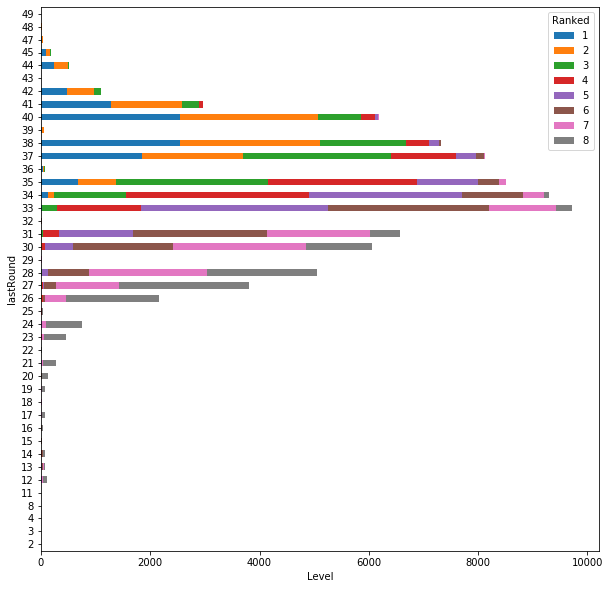

In [15]:
my_barplot_stacked('lastRound','Ranked','sup',0)

Pour avoir une meilleure idée des classes utilisé dans les synergie on peut regarder 

In [16]:
my_barplot_stacked('Ranked',distinct_classes,'supeq',2)

Pour ce qui est de la répartition des Champions, on voit que les joueurs classé premier utilise majoritairement des Champions moins utilisés par les joueurs classés dernier. On peut par exemple parler de MissFortune et de Tresh, cela se traduit par le fait que ce sont des Champions 5 étoiles et qu'il sont donc accessible avec un niveau dans la partie élevé (lois de probabilité d'obtention des exemplaires lié au niveau).

In [ ]:
my_barplot_stacked('Ranked',distinct_champions,'sup',0)

## Et si on commençait à prédire ?  

Pour toute la partie cross validation, j'ai choisi des périmètres de valeurs petit pour éviter un trop grand temps de calcul.

### Première approche Arbre de Décision 

On va dans un premier temps appliquer une prédiction sur le jeu de données que l'on a construit. On va retirer quelques colonnes qu'on ne va pas utiliser pour notre modèle. La colonne 'gameId' n'apporte aucune information, les colonnes 'gameDuration' et 'ingameDuration' apporte beaucoup d'information sur le rang puisqu'une personne terminant dernière aura un temps de jeu inférieur à une personne terminant première, et on souhaite utiliser les données liées au jeu pour prédire le rang. Enfin on enlève également les variables target 'Ranked' et la variable 'Top' que l'on a construit qui est une target secondaire. On garde la variable 'lastRound' pour commencer, c'est une variable qui a mon avis va jouer un rôle important dans la prédiction puisqu'un joueur terminant premier sera dans des rounds élevés à contrario d'un joueur terminant 8ème (quand un joueur perd, il est éliminé du jeu et les joueurs restant continuent de jouer ensemble), on verra pour la supprimer plus tard dans notre étude.

Pour réduire le temps d'execution pour la cross validation et l'élaboration des modèles on va selectionner 3000 parties donc 24000 lignes (8 joueurs par partie). On va commencer par prédire la variable target 'Ranked'.

In [32]:
# colonne à drop
drop_columns = ['gameId','Ranked','Top','gameDuration','ingameDuration']

# variable à prédire
target = ['Ranked']

# X and y
X = clean_tft_df.copy()[:24000]
X.drop(drop_columns, axis='columns', inplace=True)
y = clean_tft_df[target].copy()[:24000]

On utilise la fonction de split porposée par sklearn pour générer un train et test set. On fixe à 20% du jeu de données la taille du train set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Pour notre premier modèle on va utiliser un Arbre de Décision pour prédire la variable 'Ranked'. Pour réaliser le tuning de ce modèle on va utiliser le critère de l'erreur absolue moyenne (mean absolute error, MAE), il sera un bon indicateur de l'efficacité de notre modèle. En effet on veut prédire un classement, on veut donc minimiser l'écart entre le rang prédit et le rang cible. En faisant cela, on va supposer qu'un joueur classé au rang 5 alors qu'il a terminé au rang 6 sera plutôt bien classé. 

Pour valider les hyperparamètres de notre modèle on va utiliser des 10-fold cross validation et on choisira le paramètre qui minimise la variance de la MAE dans les différents fold et qui minimise aussi la moyenne de la MAE dans les différents fold. On va effectuer un tuning sur la profondeur de l'arbre, sur le nombre minimum d'individus dans un noeud pour le séparer et sur le nombre minimum d'individus pour déclarer un noeud comme une feuille. On va effectuer nos 10-fold cross validation sur le train set et on utilisera le test set pour tester le modèle à la fin.

In [47]:
# On définie deux fonctions pour générer une 10-CV sur des données en fonction d'un param et d'un scoring
def my_custom_cv_DT(param,scoring,X,y): ##POUR DECISION TREE
    
    model = DecisionTreeClassifier
    
    max_depth = [1,10,20,30,40,50,60,70,80,90,100]
    min_samples_split = [0.01,0.1,0.2,0.3,0.4,0.5]
    min_samples_leaf = [0.01,0.1,0.2,0.3]
    
    switcher_model = {
        'max_depth' : [model(max_depth=param_model) for param_model in max_depth],
        'min_samples_split' : [model(min_samples_split=param_model) for param_model in min_samples_split],
        'min_samples_leaf' : [model(min_samples_leaf=param_model) for param_model in min_samples_leaf]
    }
    
    switcher_range = {
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf
    }
    
    cv_var_results = []
    cv_mean_results = []

    range_model = switcher_model.get(param)
    range_param = switcher_range.get(param)
    
    for model_param in range_model:

        scores = cross_val_score(model_param, X, y, cv=10,scoring=scoring,n_jobs=-1)

        cv_var_results.append(np.var(scores))
        cv_mean_results.append(np.mean(scores)*-1)
        

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    fig.suptitle('Resultat de la 10-fold cross validation sur le paramètre' + param)
    ax1.plot(range_param, cv_var_results, 'b')
    ax1.set_ylabel(scoring + ' Variance')
    ax1.set_xlabel(param)
    ax2.plot(range_param, cv_mean_results, 'r')
    ax2.set_ylabel(scoring + ' Moyenne')
    ax2.set_xlabel(param)
    plt.show()
    
def my_custom_cv_RF(param,scoring,X,y): ##POUR RANDOM FOREST
    
    model = RandomForestClassifier
    
    
    n_estimators = [1,10,20,30,40,50,60,70,80,90,100]
    max_depth = [1,10,20,30,40,50,60,70,80,90,100]
    min_samples_split = [0.01,0.1,0.2,0.3,0.4,0.5]
    min_samples_leaf = [0.01,0.1,0.2,0.3]
    
    switcher_model = {
        'n_estimators' : [model(n_estimators=param_model) for param_model in n_estimators],
        'max_depth' : [model(max_depth=param_model) for param_model in max_depth],
        'min_samples_split' : [model(min_samples_split=param_model) for param_model in min_samples_split],
        'min_samples_leaf' : [model(min_samples_leaf=param_model) for param_model in min_samples_leaf]
    }
    
    switcher_range = {
        'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf
    }
    
    cv_var_results = []
    cv_mean_results = []

    range_model = switcher_model.get(param)
    range_param = switcher_range.get(param)

    for model_param in range_model:

        scores = cross_val_score(model_param, X, y, cv=10,scoring=scoring,n_jobs=-1)

        cv_var_results.append(np.var(scores))
        cv_mean_results.append(np.mean(scores)*-1)

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    fig.suptitle('Resultat de la 10-fold cross validation sur le paramètre' + param)
    ax1.plot(range_param, cv_var_results, 'b')
    ax1.set_ylabel(scoring + ' Variance')
    ax1.set_xlabel(param)
    ax2.plot(range_param, cv_mean_results, 'r')
    ax2.set_ylabel(scoring + ' Moyenne')
    ax2.set_xlabel(param)
    plt.show()

Commençons par la profondeur de l'arbre, le pramètre 'max_depth'. Pour l'ensemble de valeur de paramètre on va essayer 11 entre 1 et 100, cela va permettre d'avoir une idée du comportement du modèle sans avoir un temps de calcul trop grand (On utilise comme metrics pour le score la neg_mean_absolute_error qui est la MAE négative).

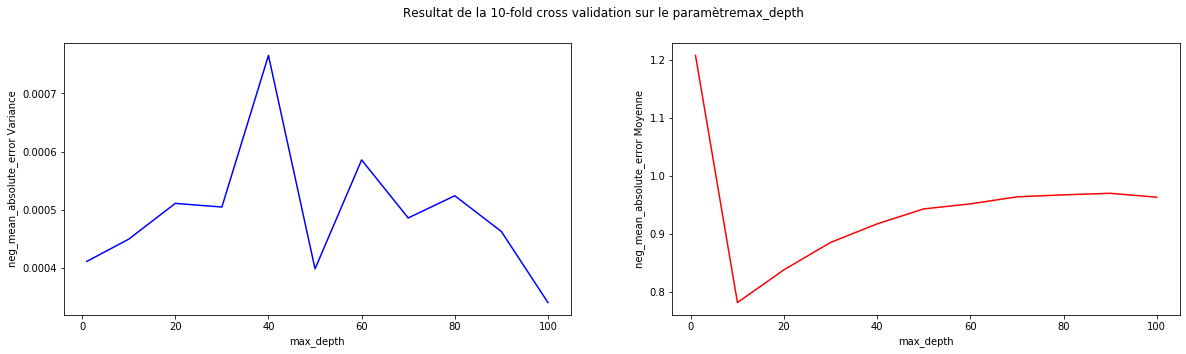

In [57]:
my_custom_cv_DT('max_depth','neg_mean_absolute_error',X_train,y_train)

Pour chaque valeur de la profondeur maximum de l'arbre, chacun des 10 folds a été choisi comme set de validation et les k-1 autres comme set d'entrainement. Ce qu'on peut voir c'est que la variance des MAE obtenues pour la 10-fold cross validation diminue quand la profondeur augmente, il semble donc qu'on ait pas un overfitting du modèle. Maintenant quand on observe la moyenne des MAE obtenues, elle atteint un minimum pour une profondeur de l'arbre d'environ 10 et ensuite elle repart à la hausse ce qui atteste d'un modèle moins efficace même si la faible variance nous atteste qu'il n'y a pas d'overfitting. La variance des MAE pour une profondeur de 10 est relativement faible, on va donc choisir 10 comme hyperparamètre pour 'max_depth'.

On va procéder de la même manière sur le nombre minimum d'individus dans un noeud pour arrêter la séparation de l'arbre, le pramètre 'min_sample_split'. Pour l'ensemble de valeur de paramètre on va essayer 5 valeurs entre 1% des individus et 50% des individus, cela va permettre d'avoir une idée du comportement du modèle sans avoir un temps de calcul trop grand (On utilise comme metrics pour le score la neg_mean_absolute_error qui est la MAE négative).

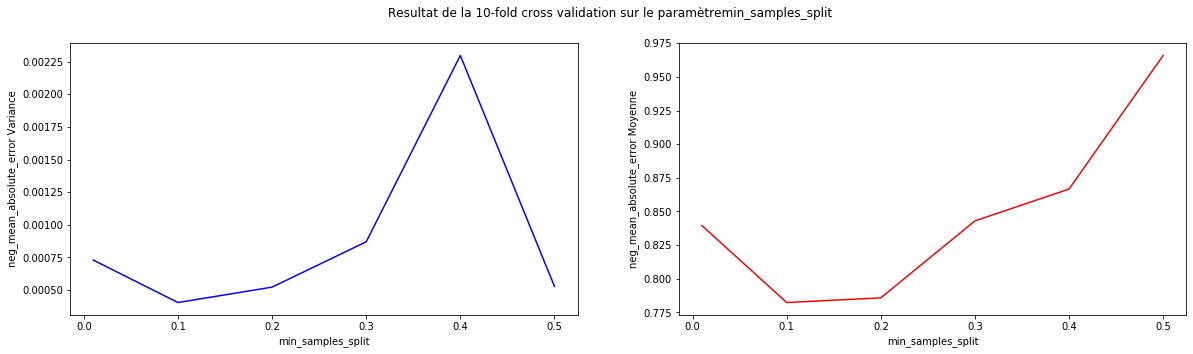

In [37]:
my_custom_cv_DT('min_samples_split','neg_mean_absolute_error',X_train,y_train)

Pour la variance des MAE on voit bien que celle-ci augmente très fortement quand on prends un pourcentage elevé d'individus comme paramètre et cela ce traduit aussi par une augmentation de la moyenne des MAE. Cette observation est logique puisque si on prend 50% des individus minimum pour effectuer un split, l'arbre ne sera pas très profond et on aura donc une efficacité reduite pusique les feuilles de l'arbre seront composé de beaucoup d'individus. 

On remarque cependant que pour 10% (0.1) la moyenne des MAE de la 10-fold CV diminue en dessous de 0.8 avant de prendre une tendance à la hausse quand le paramètre augmente. Egalement, pour 10% on a une variance des MAE faible, ce qui nous motive choisir cette valeur comme hyperparamètre pour 'min_samples_split'. 

On termine le tuning de notre modèle avec 'min_samples_leaf' qui correspond au nombre minimum d'individus que doit contenir une feuille de l'arbre. On va faire varier cette valeur entre 1% des individus et 50% des individus, pour 5 valeurs du paramètre. 

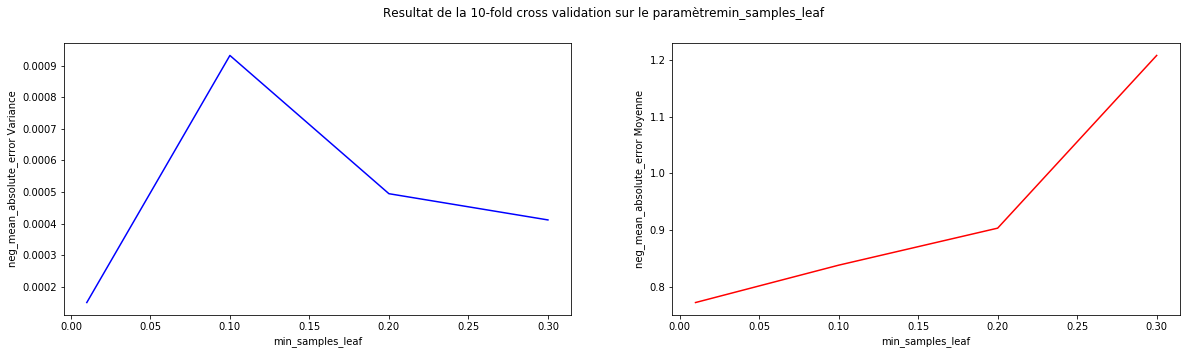

In [38]:
my_custom_cv_DT('min_samples_leaf','neg_mean_absolute_error',X_train,y_train)

On voit directement que la moyenne des MAE augmente beaucoup quand le pourcentage minimum d'individus dans une feuille augmente, c'est logique puisqu'à 50% on va séparer en deux nos données et on prédira sur une règle de décision, ce qui fait logiquement augmenter la moyenne des MAE même si la variance des MAE reste faible (logique également puisqu'il n'y a pas d'overfitting dans ce cas, on est même dans le cas d'un underfitting). Pour 0.5% (0.05) il semble qu'on ait de bon résultat avec une faible variance et une faible moyenne des MAE. On va donc choisir 0.5% comme hyperparamètre pour le paramètre 'min_samples_leaf'.

On va pouvoir à présent utiliser notre modèle pour prédire les rang des joueurs du set de test. Pour analyser l'efficacité de la prédiction, on va regarder la MAE mais aussi l'erreure carré moyenne (qui donnera plus d'importance à de grosse erreur de classement exemple 1er classé 6ème avec MAE on a une erreur de 5 avec MSE on a une erreur de 25) et le taux de prédiciton sur le set de test et sur le set de train pour s'assurer qu'il n'y a pas d'overfitting (même si notre analyse préliminaire devrait nous l'assurer).

In [85]:
model = DecisionTreeClassifier(max_depth=10,min_samples_split=0.1,min_samples_leaf=0.01)
pipeline = Pipeline(steps=[
    ('DecisionTreeClassifier', model)
])

pipeline.fit(X_train, y_train)
pipeline_predictions = pipeline.predict(X_test)

Decision Tree Metrics
Mean Absolute Error : 0.78
Mean Squared Error : 1.31
Test Score : 43.31 %
Train Score : 42.82 %


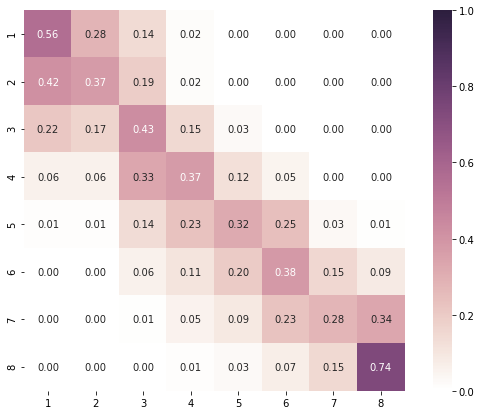

Random Score : 12.38 %


In [86]:
print('Decision Tree Metrics')
print("Mean Absolute Error :",round(mean_absolute_error(pipeline_predictions, y_test),2))
print("Mean Squared Error :",round(mean_squared_error(pipeline_predictions, y_test),2))
print("Test Score :",round(pipeline.score(X_test,y_test)*100,2),"%")
print("Train Score :", round(pipeline.score(X_train,y_train)*100,2),"%")

show_confusion_matrix(confusion_matrix(y_test.Ranked.values,pipeline_predictions))

y_pred_random = [np.random.randint(1,9) for i in range(len(y_test))]
print("Random Score :", round(np.sum(y_pred_random == y_test.Ranked.values)/y_test.size*100,2),"%")

A titre de comparaison on a tiré aléatoirement le rang pour le nombre d'individus du set de test et on a calculé le taux de prédiction, celui-ci est de 12.27%. Cela donnera une information sur la performance du modèle par la suite.

Première chose que l'on va observer c'est qu'on a pas d'overfitting du modèle puisque le taux de prédiction du set d'entrainement n'est pas clairement supérieur à celui de test. On a donc un taux de 43% de bonnes prédictions, ce qui est plutôt satisfaisant sachant qu'on a une MAE de 0.78, c'est à dire qu'on se trompe en moyenne de moins d'un rang dans le classement. Enfin si on regarde la MSE de 1.31, elle est proche de la MAE, on se trompe donc en moyenne d'un écart de rang qui n'est pas trop grand.

Maintenant si on regarde en détail, les joueurs ayant terminés 8ème sont bien classé à 74%, 15% sont classés 7ème et 11% entre 4 et 6, ce qui est plutôt efficace. Si on regarde les joueurs classés à tord 8ème, 34% sont des joueurs qui ont fini 7ème et 8% des joueurs ayant fini 6ème, encore une fois c'est plutôt intéressant puisqu'on ne classe pas mieux les joueurs que ce qu'ils ont réalisé.

Si on regarde le haut du classement avec le Top 3, on voit qu'ils sont environs à 50% bien classé et les 50% restant se trompe avec le Top 3 ( par exemple 38% des joueurs ayant terminé 2ème sont classés à tord 1er). Seul 16% des joueurs ayant terminés 3ème sont classés 4ème. Même si le taux de prédiction n'est pas énorme, le modèle a correctement séparé le Top 3 voir le Top 4 du reste. 

Si je rajoute à cela mon expérience en temps que joueur, ces résultats ne m'étonne pas, en effet la première et seconde place se joue de peu et cela est même vrai pour les Top 4. Pour ce qui est du milieu de tableau (4 à 7 joueurs) on voit que le modèle a du mal à correctement prédire leur rang. Mais dans le jeu de la même façon les joueurs terminant à ces rangs perdent souvent en même temps et cela se joue de peu (petite remarque sur le classement, pour un certain round si 3 joueurs perdent alors c'est celui qui aura survécu le plus longtemps à son adversaire qui sera le mieux classé).

Et si on regardait notre arbre de décision pour voir les variables qu'il utilise ?

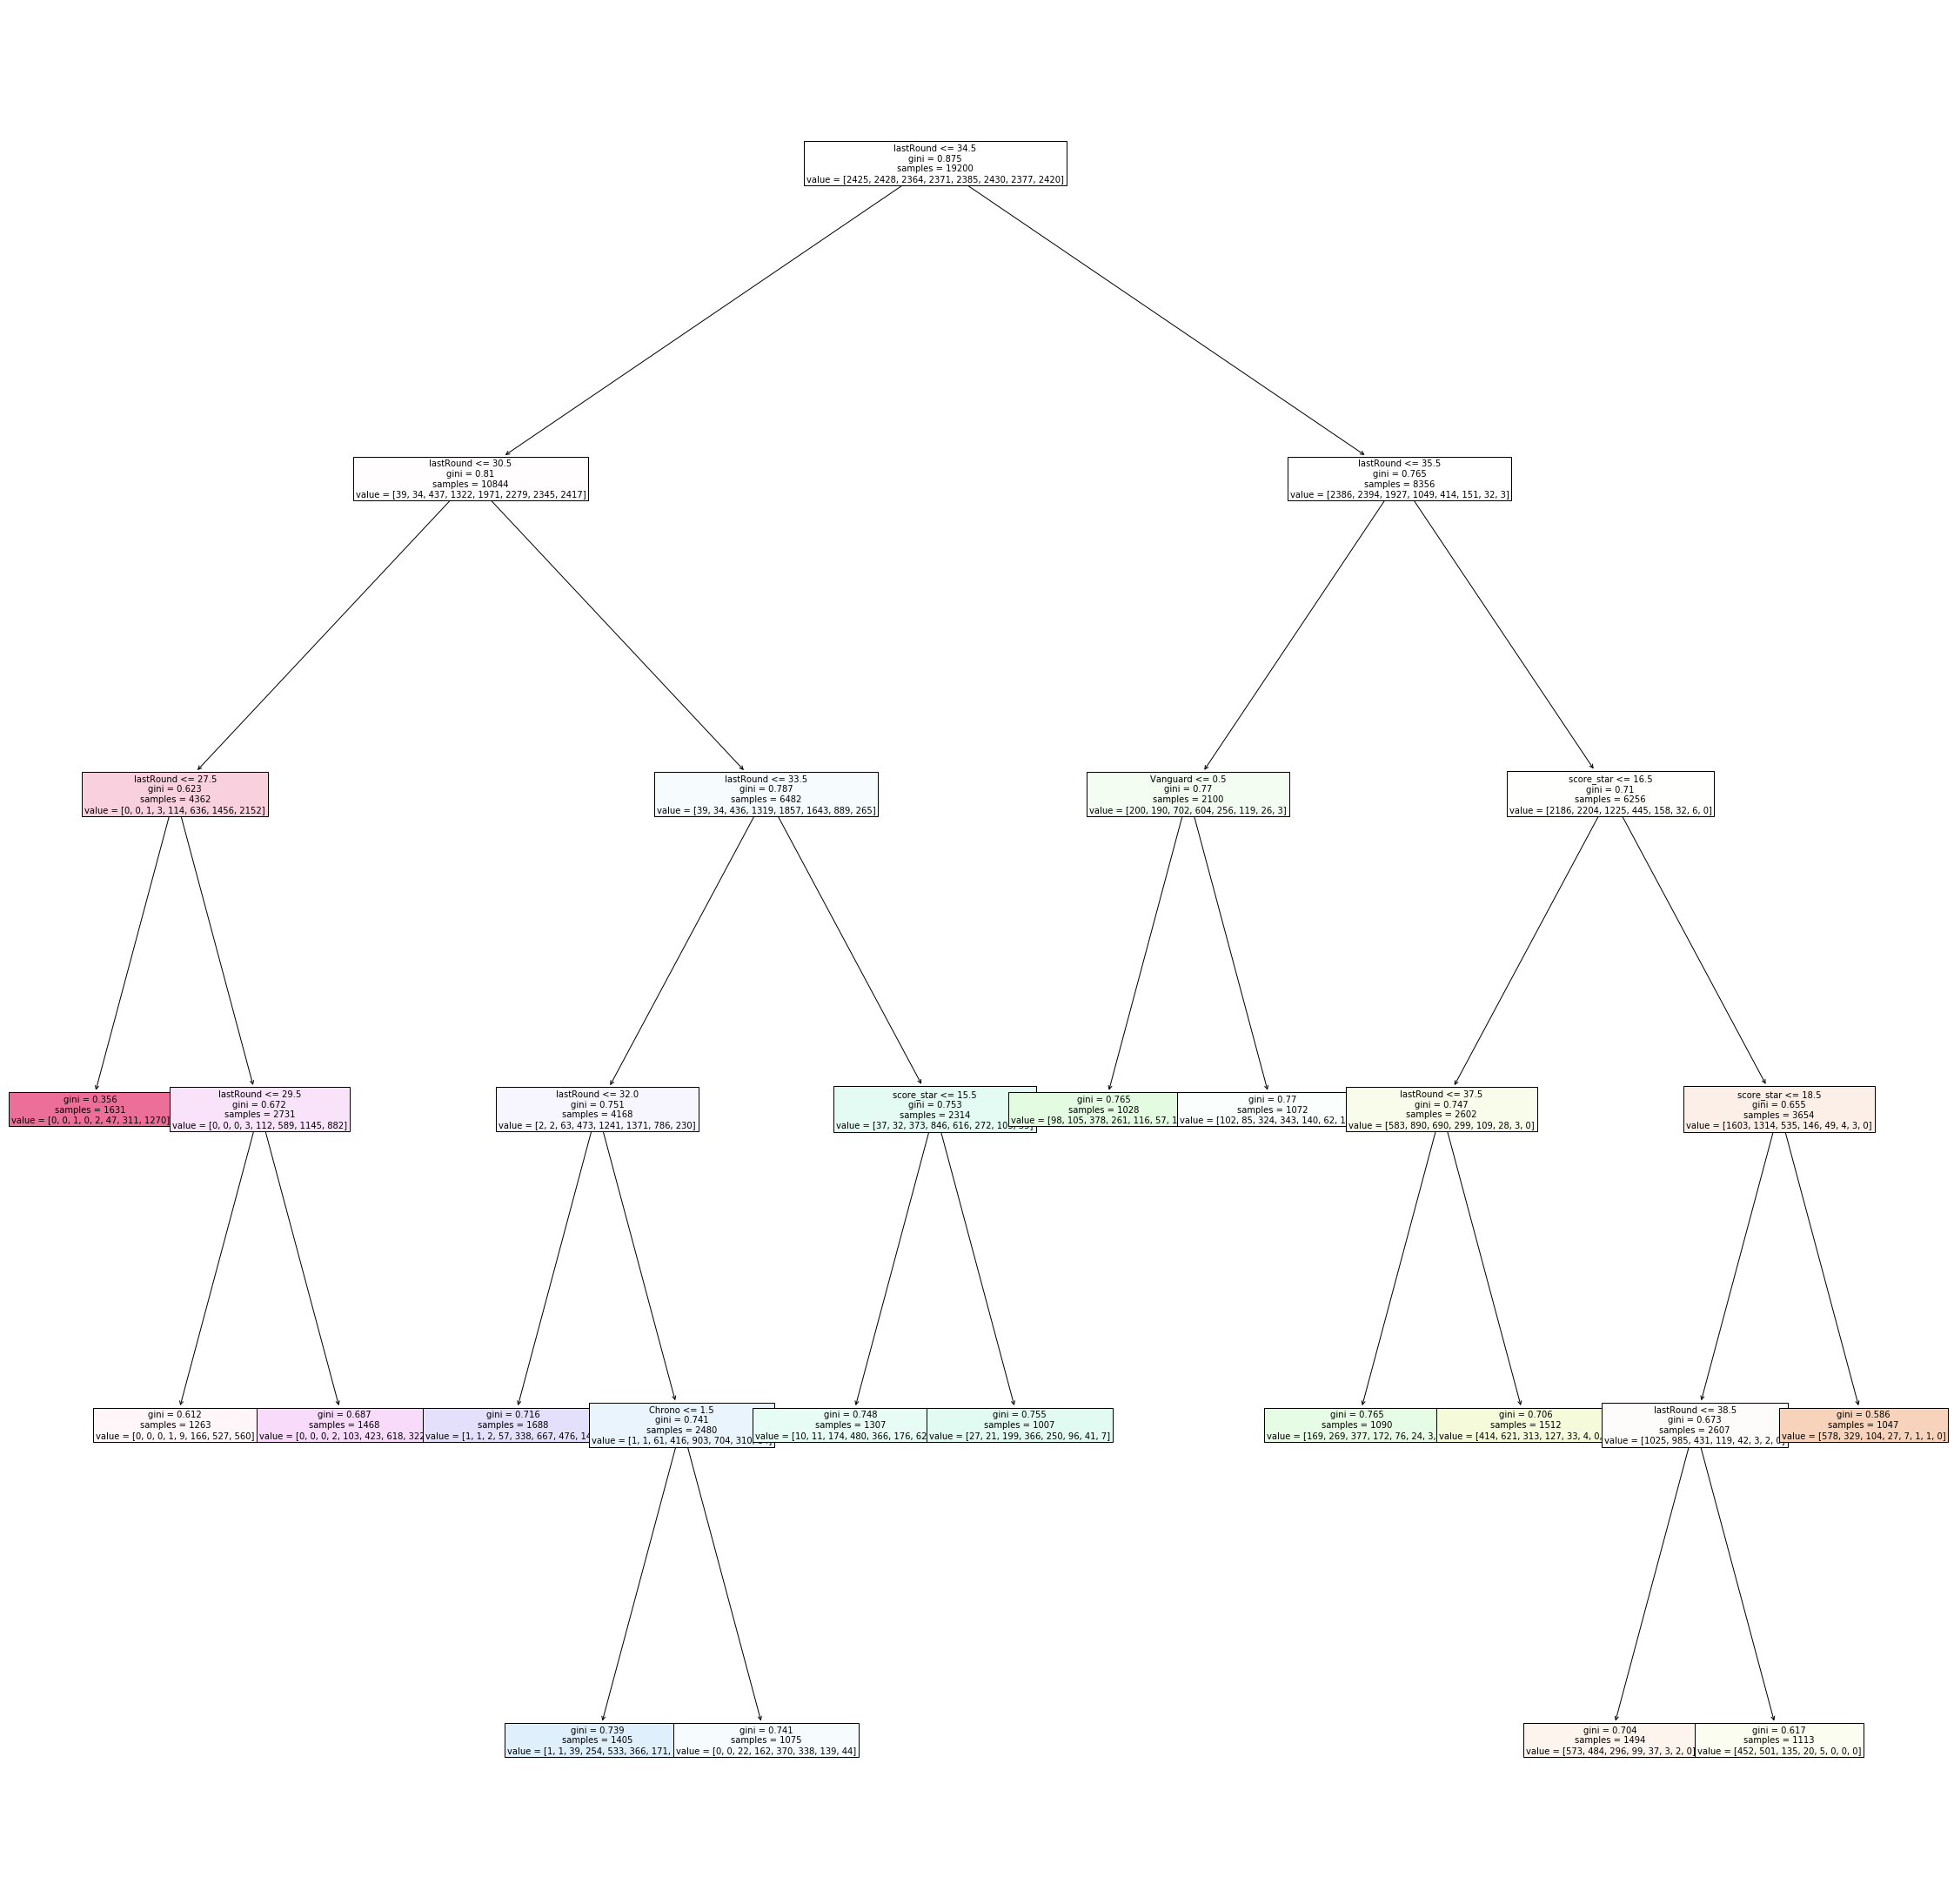

In [30]:
plt.figure(figsize=(40,40))
plot_tree(model,feature_names = list(X_train.columns),filled=True,fontsize=10)
plt.show()

Comme supposé, la variable 'lastRound' joue un rôle majeure dans la prédiction, on peut voir que le premier split la règle de décision sépare directement en proportion les joueurs du haut du classement de ceux du bas du classement (cette variable est corrélée au rang). On peut voir que la variable 'score_star' joue aussi un rôle ce qui n'est pas étonnant puisqu'elle cumule le nombre d'étoiles des Champions d'un joueur et un Champion avec beaucoup d'étoile nottament 3, devient très puissant.

Finalement ce modèle ne me convient pas, je préférerais prédire le classement en utilisant les informations sur la composition, la force de l'équipe et la synergie utilisé. On va donc reproduire notre étude en supprimant 'lastRound', 'score_star' et 'score_items'. On va garder le même set d'entrainement et de test pour pouvoir comparer les résultats.

In [39]:
# On drop 'lastRound' de nos set de train et de test
X_train2 = X_train.drop(['lastRound','score_star','score_items'],axis='columns').copy()
X_test2 = X_test.drop(['lastRound','score_star','score_items'],axis='columns').copy()

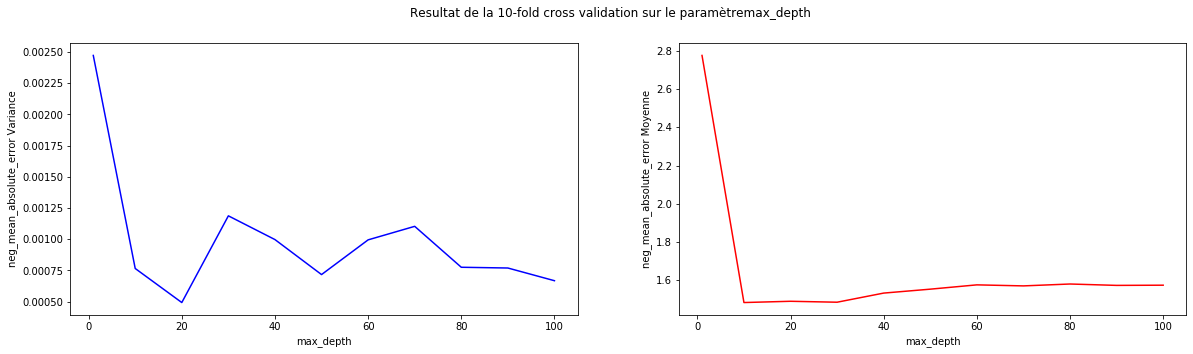

In [40]:
my_custom_cv_DT('max_depth','neg_mean_absolute_error',X_train2,y_train)

Comme pour le modèle précédent, on choisi l'hyperparamètre qui va minimiser la variance et la moyenne des MAE du 10-fold cross validation. Pour ce modèle on voit qu'une profondeur maximum de 20 pour l'arbre permet d'avoir une variance minimum et une moyenne des MAE correcte (même si elle n'est pas minimum car pour 15 comme avant, la variance est plus élevé ce qu'on ne veut pas).

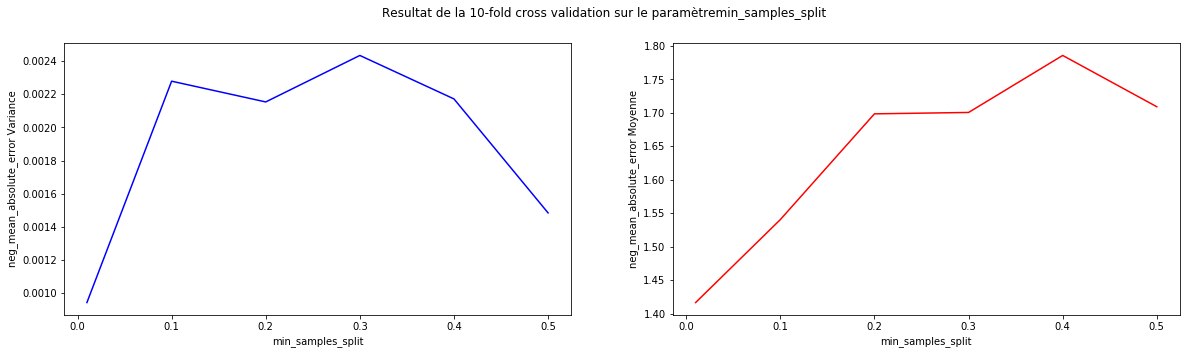

In [80]:
my_custom_cv_DT('min_samples_split','neg_mean_absolute_error',X_train2,y_train)

Pour le nombre minimum d'individus dans un noeud pour le séparer, on va rester sur une valeur de 10% puisqu'elle minimise variance et moyenne des MAE de la 10-fold cross validation.

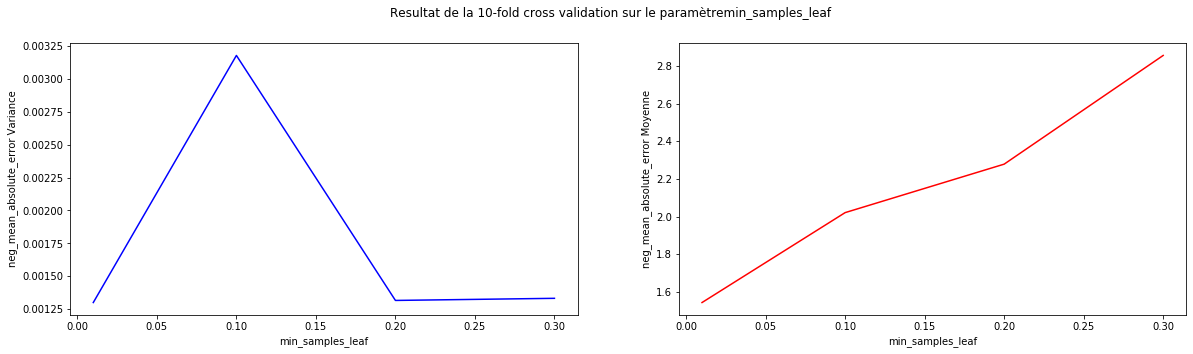

In [42]:
my_custom_cv_DT('min_samples_leaf','neg_mean_absolute_error',X_train2,y_train)

Pour terminer sur le tuning, le nombre minimum d'individus dans une feuille de l'arbre, 1% semble être une bon paramêtre puisqu'il a une faible variance et une faible moyenne des MAE sur la 10-fold cross validation. 

On peut maintenant construire le nouveau modèle avec ses hyperparamètres et observer nos nouvelles prédictions.

In [90]:
model2 = DecisionTreeClassifier(max_depth=20,min_samples_split=0.01,min_samples_leaf=0.01)
pipeline = Pipeline(steps=[
    ('DecisionTreeClassifier', model2)
])

pipeline.fit(X_train2, y_train)
pipeline_predictions = pipeline.predict(X_test2)

Decision Tree Metrics
Mean Absolute Error : 1.58
Mean Squared Error : 4.49
Test Score : 24.69 %
Train Score : 27.72 %


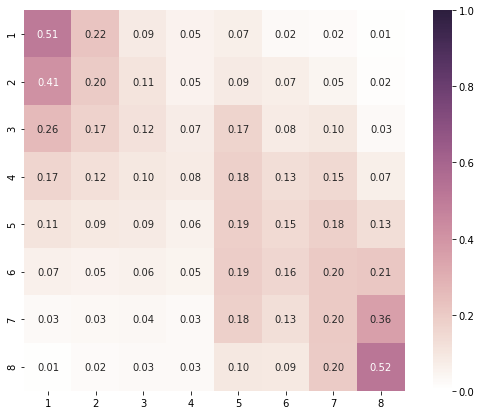

Random Score : 12.62 %


In [91]:
print('Decision Tree Metrics')
print("Mean Absolute Error :",round(mean_absolute_error(pipeline_predictions, y_test),2))
print("Mean Squared Error :",round(mean_squared_error(pipeline_predictions, y_test),2))
print("Test Score :",round(pipeline.score(X_test2,y_test)*100,2),"%")
print("Train Score :", round(pipeline.score(X_train2,y_train)*100,2),"%")

show_confusion_matrix(confusion_matrix(y_test.Ranked.values,pipeline_predictions))

y_pred_random = [np.random.randint(1,9) for i in range(len(y_test))]
print("Random Score :", round(np.sum(y_pred_random == y_test.Ranked.values)/y_test.size*100,2),"%")

Premièrement on peut observer que le modèle n'est pas overfit puisque les taux de prédictions sont du même ordre et en adéquation avec les 10-fold cross validation que l'on a effectué.

On peut voir que le taux de prédiction du set de test est de 25%, clairement moins bien une fois les variables 'lastRound', 'score_star' et 'score_items' retirées. On voit également que la MAE est de 1.57, on se trompe donc en moyenne de plus d'un rang maintenant et la MSE est montée à 4.49 ce qui veut dire que l'on se trompe en moyenne de beaucoup de rang. 

Néanmoins les joueurs terminant au rang 1 sont prédit au rang 1 dans 51% et les joueurs terminant au rang 8 sont prédit au rang 8 dans 52%. Ce que l'on peut observer sur la matrice de confusion c'est que les joueurs terminant au rang 2 et 3 sont respectivement prédit au rang 1 à 41% et 26%. Idem pour les rang 4 et 5 dans des taux plus faible mais cela mets en avant le phénomène du jeu dont je parlais où les joueurs terminant dans le Top 4 sont souvent très proche à la fin de la partie et cela se joue de peu. De la même façon du rang 5 au rang 7 les joueurs sont prédit au rang 7 et 8 avec de gros taux, cela manifeste que les joueurs terminant dans le bas du tableau perdent aussi de peu face à leur adversaire.  

Cette analyse avec comme données uniquement les champions et leurs objets ainsi que les synergies montre un manque d'information important sur la partie. En effet une partie importante de la stratégie de TFT (sachant qu'on étudie les joueurs classés Challenger c'est à dire les meilleurs du jeu) consiste au placement des Champions sur le terrain à chaque round pour affronter un adversaire. C'est une information que l'on a pas. A titre d'exemple le Champion Blitzcrank a pour sort 'grappin' qui lui permet d'attirer à lui le joueur situé le plus loin de lui en terme de case, ainsi il peut attirer un joueur avec peu de vie et qui fait beaucoup de dommage à distance directement proche de ses champions pour l'éliminer, laissant son adversaire sans son Champion faisant le plus de dommage. 

On peut néanmoins visualiser le début de l'arbre de décision pour voir que cette fois-ci le nombre d'étoile des champions et les synergies rentrent en considération (on affiche que d'une profondeur de 5 pour problème de visualisation).

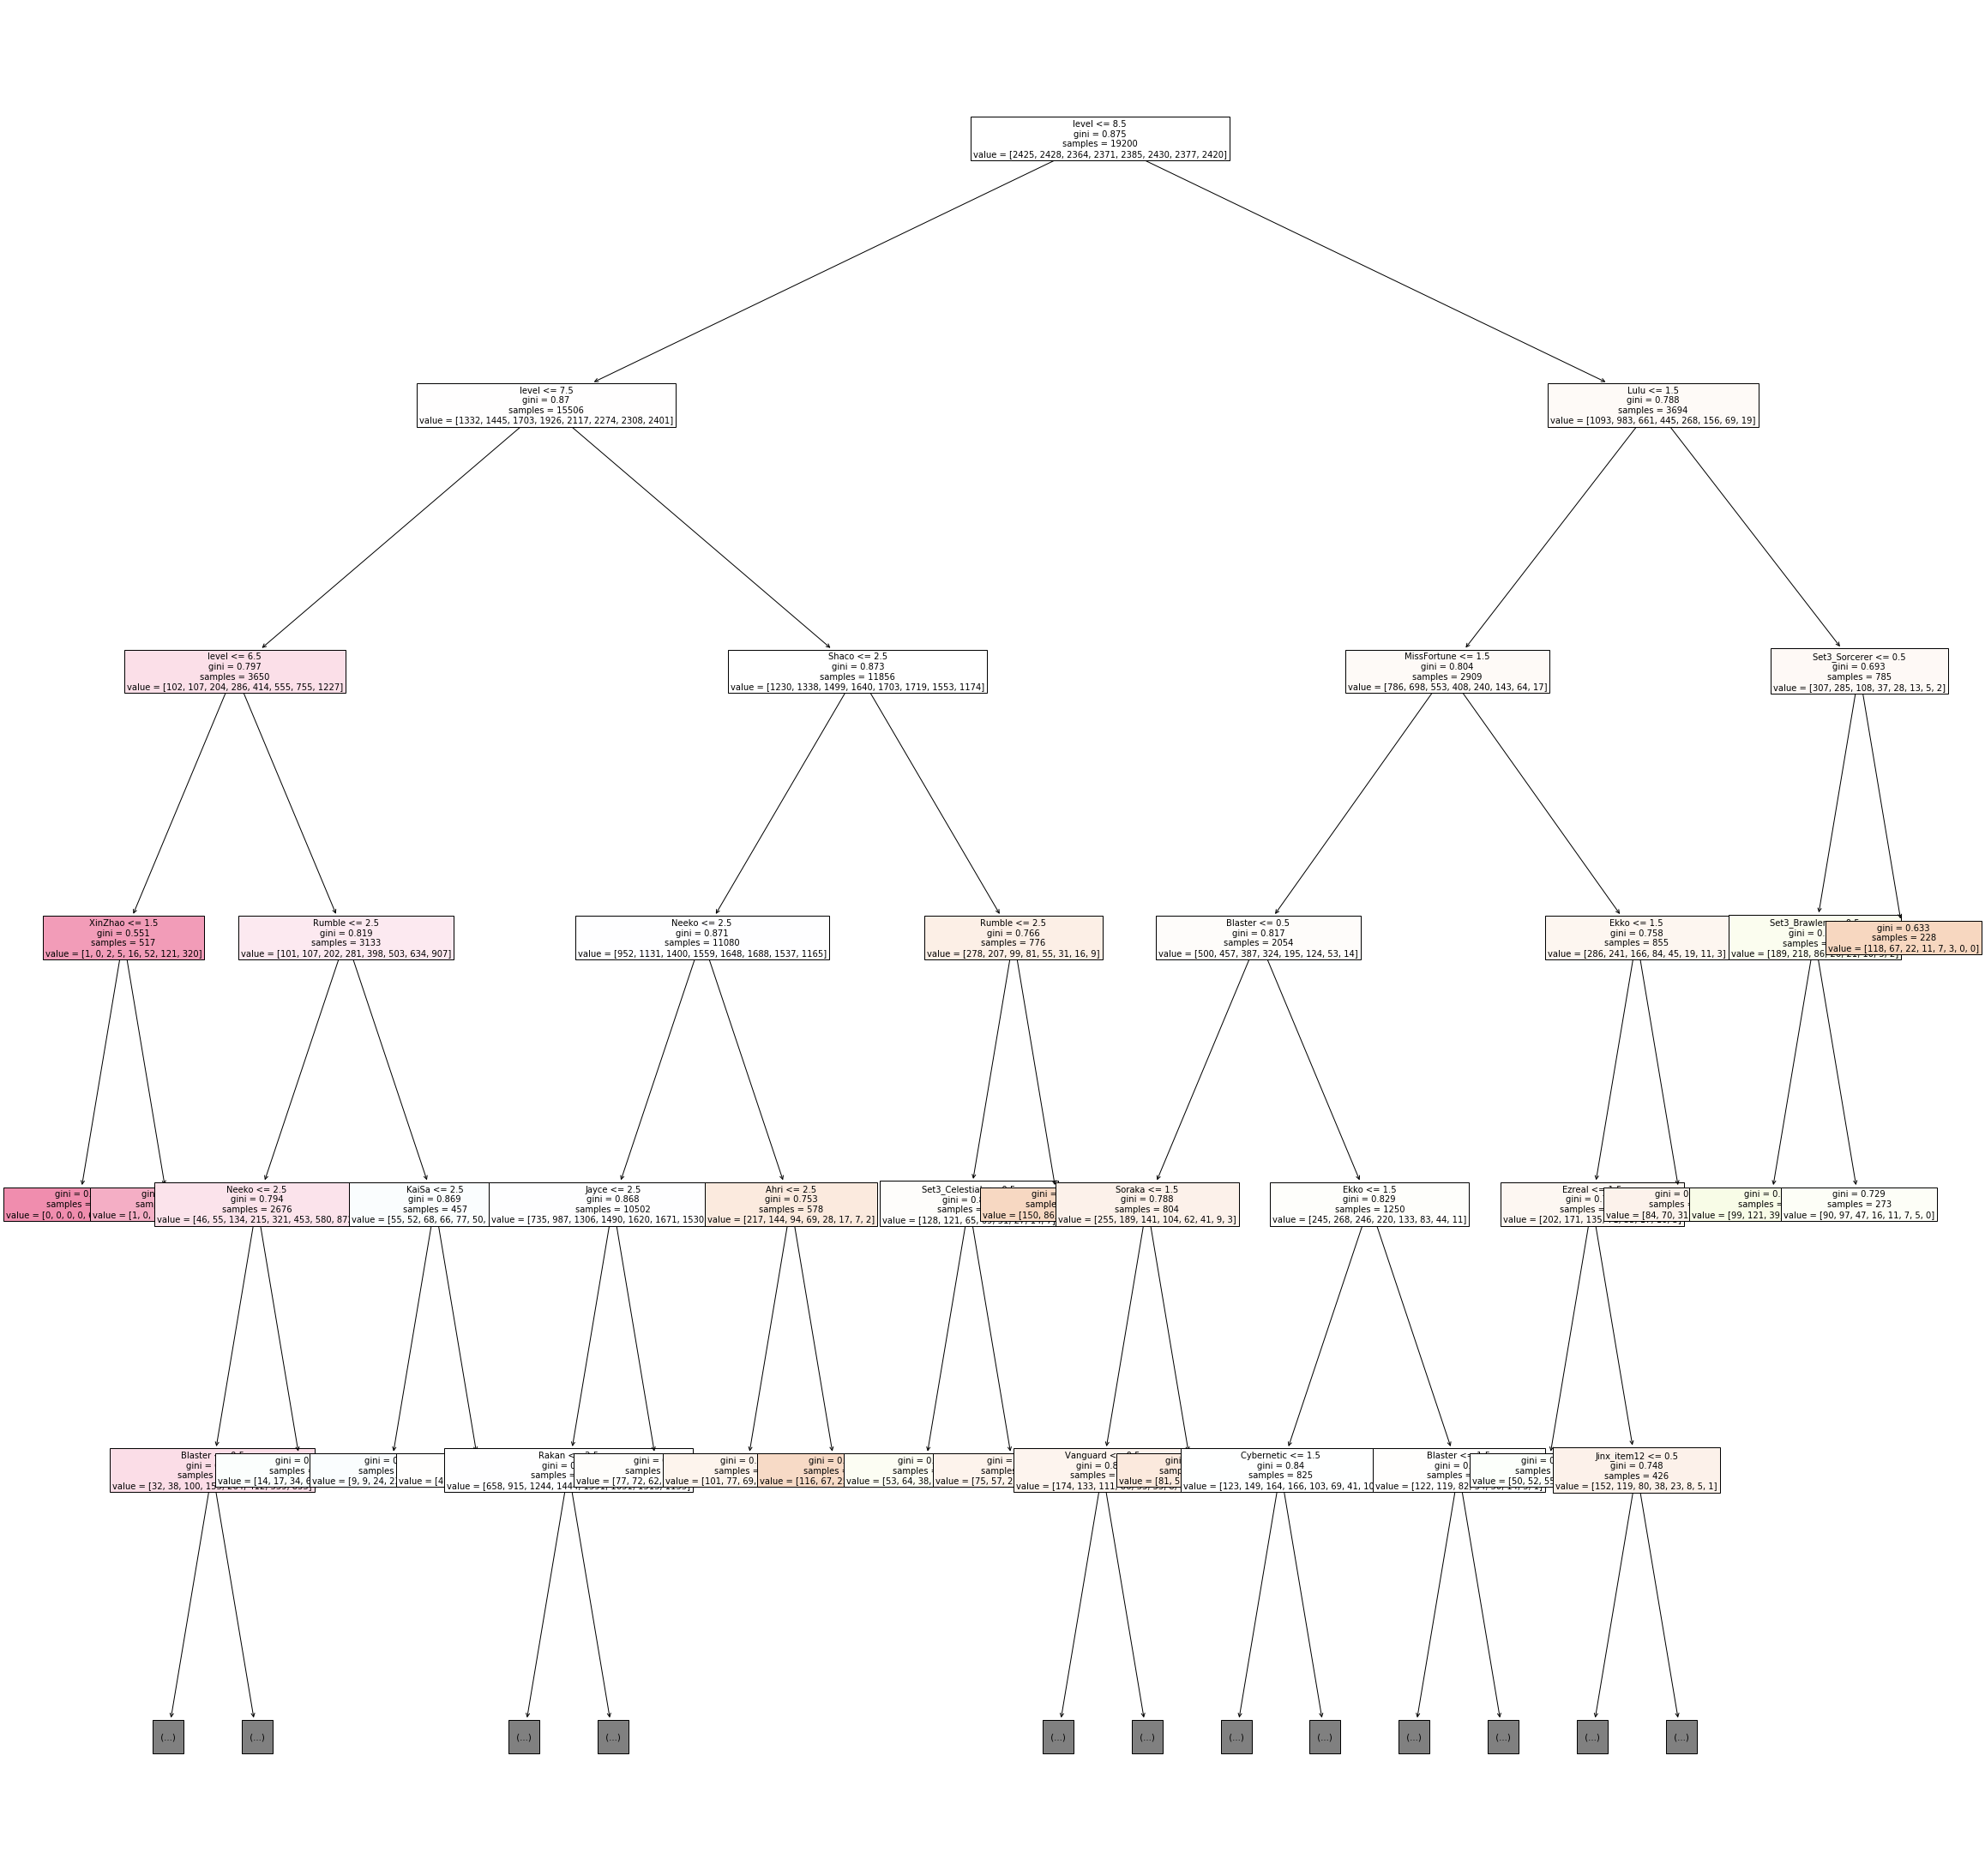

In [58]:
 plt.figure(figsize=(40,40))
plot_tree(model2,feature_names = list(X_train2.columns),filled=True,fontsize=10,max_depth=5)
plt.show()

### Deuxième approche Random Forest

Pour continuer notre étude, on va rester sur le même jeu de données que pour le dernier modèle et on va utiliser une Random Forest pour prédire la variable 'Ranked'. Pour cela on va de la même manière chercher les hyperparamètres de notre Random Forest via un 10-fold cross validation. 

Les hyperparamètres que l'on va chercher sont le nombre d'arbre de décision qui compose la Radom Forest, la profondeur maximum des arbres et les paramètres 'min_samples_split' et 'min_samples_leaf'.

Pour cette partie on s'abstiendra de commenter, on appliquera le même raisonnement que précédemment en choisisant le paramètre qui minimise la variance et la MAE.

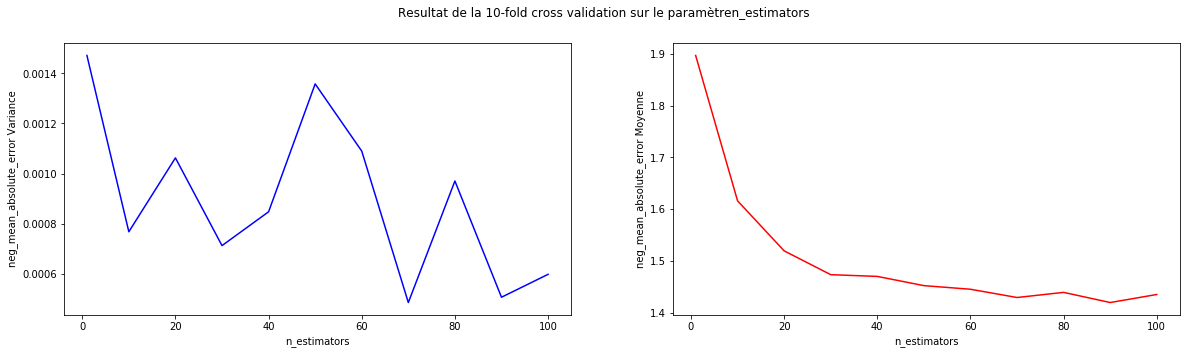

In [48]:
my_custom_cv_RF('n_estimators','neg_mean_absolute_error',X_train2,y_train)

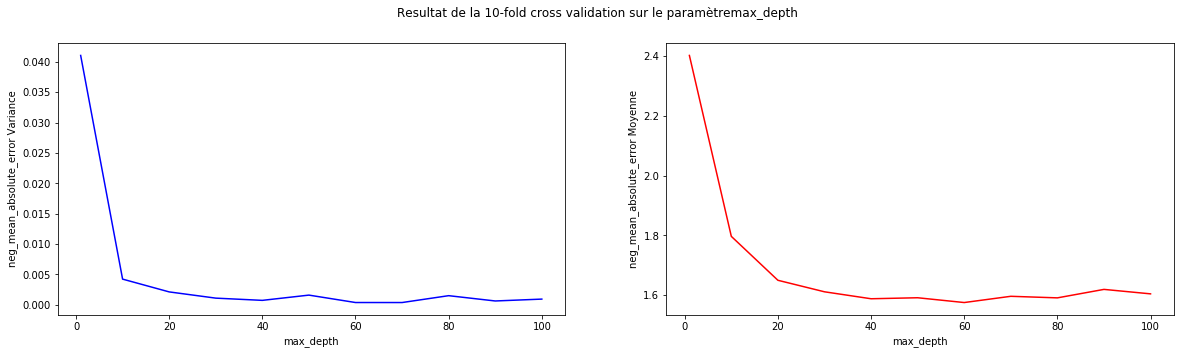

In [49]:
my_custom_cv_RF('max_depth','neg_mean_absolute_error',X_train2,y_train)

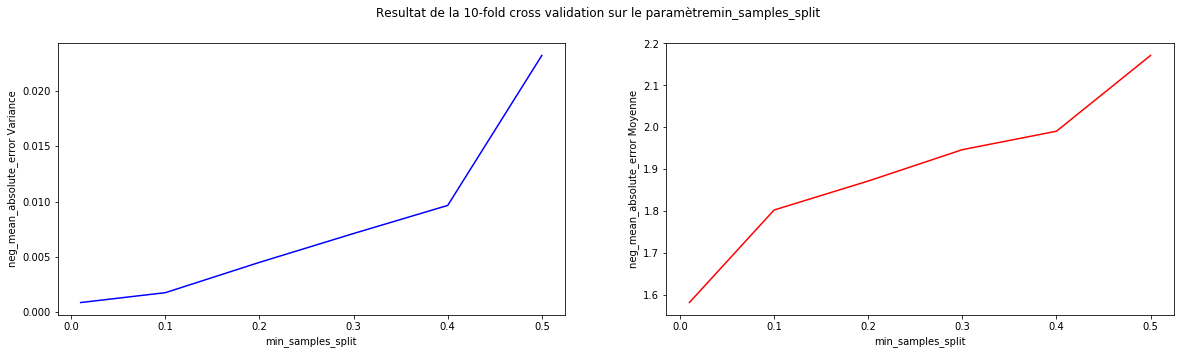

In [50]:
my_custom_cv_RF('min_samples_split','neg_mean_absolute_error',X_train2,y_train)

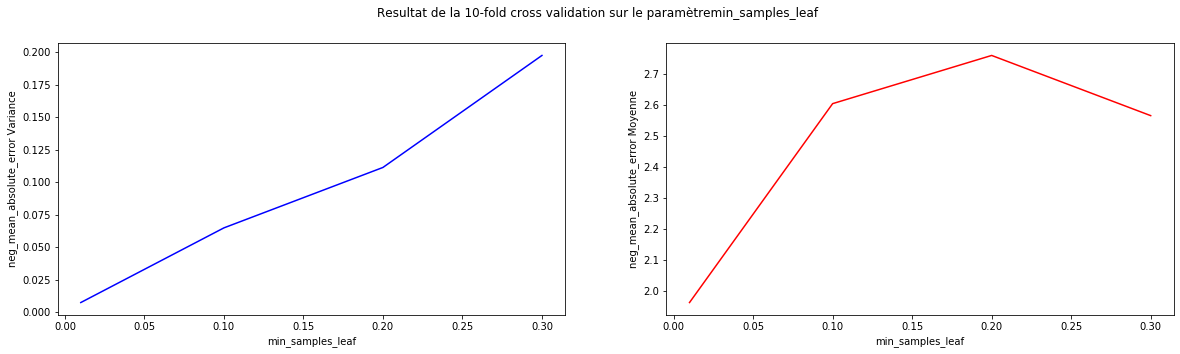

In [51]:
my_custom_cv_RF('min_samples_leaf','neg_mean_absolute_error',X_train2,y_train)

On va maintenant construire notre random forest et l'utiliser pour prédire le rang avec les paramètres obtenus.

In [92]:
model3 = RandomForestClassifier(n_estimators=85,max_depth=85,min_samples_split=0.01,min_samples_leaf=0.01)
pipeline = Pipeline(steps=[
    ('RandomForestClassifier', model3)
])

pipeline.fit(X_train2, y_train.values.ravel())
pipeline_predictions = pipeline.predict(X_test2)

Random Forest Metrics
Mean Absolute Error : 1.8
Mean Squared Error : 5.95
Test Score : 24.08 %
Train Score : 26.14 %


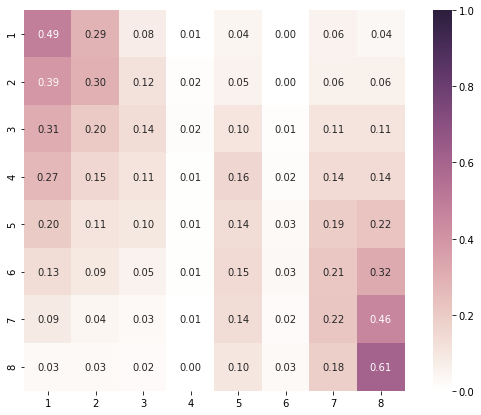

Random Score : 12.27 %


In [93]:
print('Random Forest Metrics')
print("Mean Absolute Error :",round(mean_absolute_error(pipeline_predictions, y_test),2))
print("Mean Squared Error :",round(mean_squared_error(pipeline_predictions, y_test),2))
print("Test Score :",round(pipeline.score(X_test2,y_test)*100,2),"%")
print("Train Score :", round(pipeline.score(X_train2,y_train)*100,2),"%")

show_confusion_matrix(confusion_matrix(y_test.Ranked.values,pipeline_predictions))

y_pred_random = [np.random.randint(1,9) for i in range(len(y_test))]
print("Random Score :", round(np.sum(y_pred_random == y_test.Ranked.values)/y_test.size*100,2),"%")

L'utilisation d'un modèle de Random Forest n'améliore pas notre prédiction, on se retrouve avec des metrics proches de celles obtenues avec un unique arbre de décision. Cependant il est intéressant de voir la configuration de la matrice de confusion.

Le phénomène légèrement observé sur le dernier modèle s'est amplifié. On voit très nettement que les joueurs sont classés majoritairement au rang 1,2,6 et 8. Cela manifeste la force similaire des compositions des joueurs finissant dans le Top 4 et ceux finissant du rang 5 au rang 8. Visuellement ce sont les 4 lignes verticales que l'on peut observer sur la matrice de confusion. La première ligne verticale est celle où le joueur est prédit au rang 1 on voit que le taux part de 48% pour les joueurs ayant vraiment terminé rang 1 et cela décroit jusqu'au joueur classés rang 5 qui sont prédit au rang 1 à 19%. Même phénomène sur le rang 2 mais avec des taux plus faible. La troisième ligne verticale correspond aux joueurs prédit au rang 6, on peut voir que les taux sont environs de 15% et sont associé aux joueurs ayant vraiment fini du rang 4 au rang 7. Enfin la dernière ligne verticale pour les joueurs prédit au rang 8, on voit le même phénomène que la première ligne verticale, mais à l'inverse, les joueurs ayant terminés au rang 4 et plus sont classés avec des taux de 16% à 61% quand ils sont vraiment classé rang 8.

En tant que joueur, je pense avoir une idée de l'origine de ce phénomène, les 'counter' dont j'ai parlé en introduction. Ce sont les compositions qui contre d'autres compositions, cela veut dire qu'une composition forte dans dans une partie sans counter ne gagnera pas forcément si elle se retrouve dans une partie où un joueur utilise une composition qui le 'counter'. J'ai voulu prendre en compte cette information via le 'gameId' puisqu'on a accès aux compositions dans une partie mais je ne sais pas à quel point utiliser l'information d'autres lignes qui peuvent se retrouver dans le set de train et dans le set de test ajoute un biais à la prédiction (je serais vraiment interessé par votre retour sur cela).

Dans la conclusion de cette étude on reviendra sur les différents phénomènes obersvés, les limites des données et les améliorations envisageable dans le futur.

Cette nouvelle analyse me donne envie d'essayer de prédire le Top 4 des joueurs dans une partie. Pour cela on va utiliser la variable que l'on a définie au début du projet 'Top'.

## Prédiction du Top 4 

Comme pour la prédiciton de la variable 'Ranked', on va prédire la variable 'Top', dans cette prédiction on va juste utiliser un arbre de décision comme modèle. On va appliquer une cross validation de 10-fold. 

Pour cette partie, on va ici utiliser le score f1 pour la cross validation. Il donne une bonne appréciation de la précision et du rappel d'un modèle. C'est quelques chose qui nous interesse puisqu'on veut éviter de classer un joueur du Top 4 comme perdant et un joueur perdant comme un joueur du Top 4 (puisqu'on gagne des points de classement). On souhaite donc minimiser la variance de cette estimateur mais maximiser sa moyenne dans la cross validation.

On se passera de commenter le choix des hyperparamètres, mais on applique la reflexion comme pour le reste de l'étude.

In [62]:
# colonne à drop
drop_columns = ['gameId','Ranked','Top','level','gameDuration','ingameDuration',
                'lastRound','score_star','score_items']

# variable à prédire
target = ['Top']

# X and y
X_top = clean_tft_df.copy()[:24000]
X_top.drop(drop_columns, axis='columns', inplace=True)
y_top = clean_tft_df[target].copy()[:24000]

In [63]:
X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top, y_top, test_size=0.20)

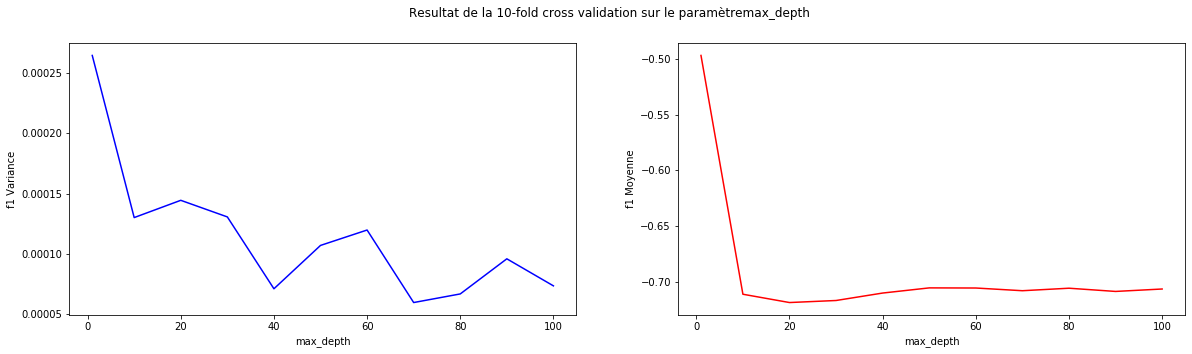

In [64]:
my_custom_cv_DT('max_depth','f1',X_top_train,y_top_train)

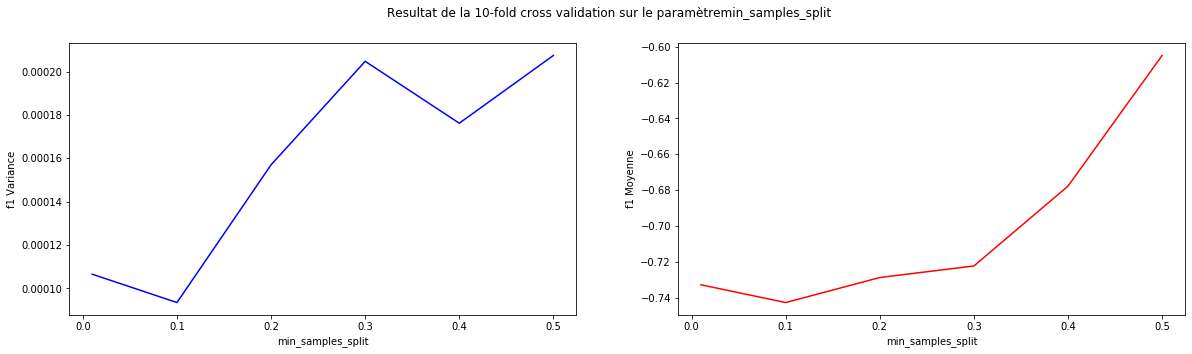

In [65]:
my_custom_cv_DT('min_samples_split','f1',X_top_train,y_top_train)

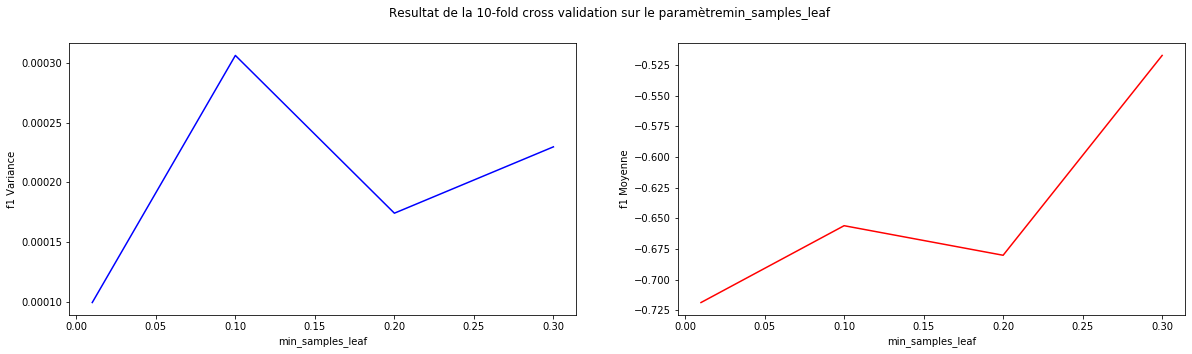

In [66]:
my_custom_cv_DT('min_samples_leaf','f1',X_top_train,y_top_train)

In [87]:
model4 = DecisionTreeClassifier(max_depth=70,min_samples_split=0.1,min_samples_leaf=0.01)
pipeline = Pipeline(steps=[
    ('RandomForestClassifier', model4)
])

pipeline.fit(X_top_train, y_top_train.values.ravel())
pipeline_predictions = pipeline.predict(X_top_test)

Decision Tree Metrics
ROC Area Under Curve : 0.72
Test Score : 72.23 %
Train Score : 72.9 %


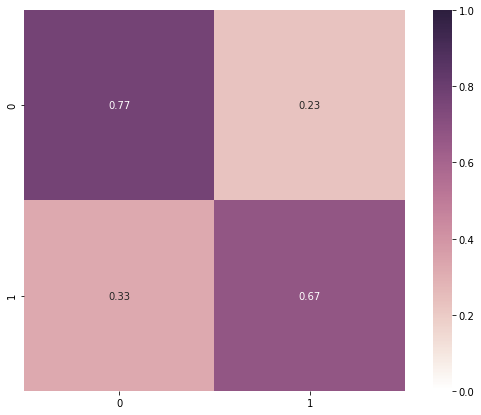

Random Score : 50.12 %


In [88]:
print('Decision Tree Metrics')
print("ROC Area Under Curve :",round(roc_auc_score(pipeline_predictions, y_top_test),2))
print("Test Score :",round(pipeline.score(X_top_test,y_top_test)*100,2),"%")
print("Train Score :", round(pipeline.score(X_top_train,y_top_train)*100,2),"%")

show_confusion_matrix(confusion_matrix(y_top_test.Top.values,pipeline_predictions,1),1)

y_pred_random = [np.random.randint(0,2) for i in range(len(y_top_test))]
print("Random Score :", round(np.sum(y_pred_random == y_top_test.Top.values)/y_top_test.size*100,2),"%")

Le taux de prédiction du Top 4 est de 73%, ce qui est une bonne prédiction. On observe que 77% des joueurs finissant en dehors du Top 4 sont bien rédit et 67% du Top 4 sont prédit Top 4. Enfin 23% des joueurs ne terminant pas dans le Top 4 sont prédit comme dans le Top 4, donc seulement 23% des joueurs ne devant pas gagner de points de classement sont prédit comme en gagnant. Et de façons inverse, 33% des joueurs du Top 4 sont prédit comme n'y étant pas, même si cela est embêtant on préfére retirer des points de classement à tord qu'en donner.

Ci dessous on propose comme dans le reste de l'étude, l'arbre de décision du modèle.

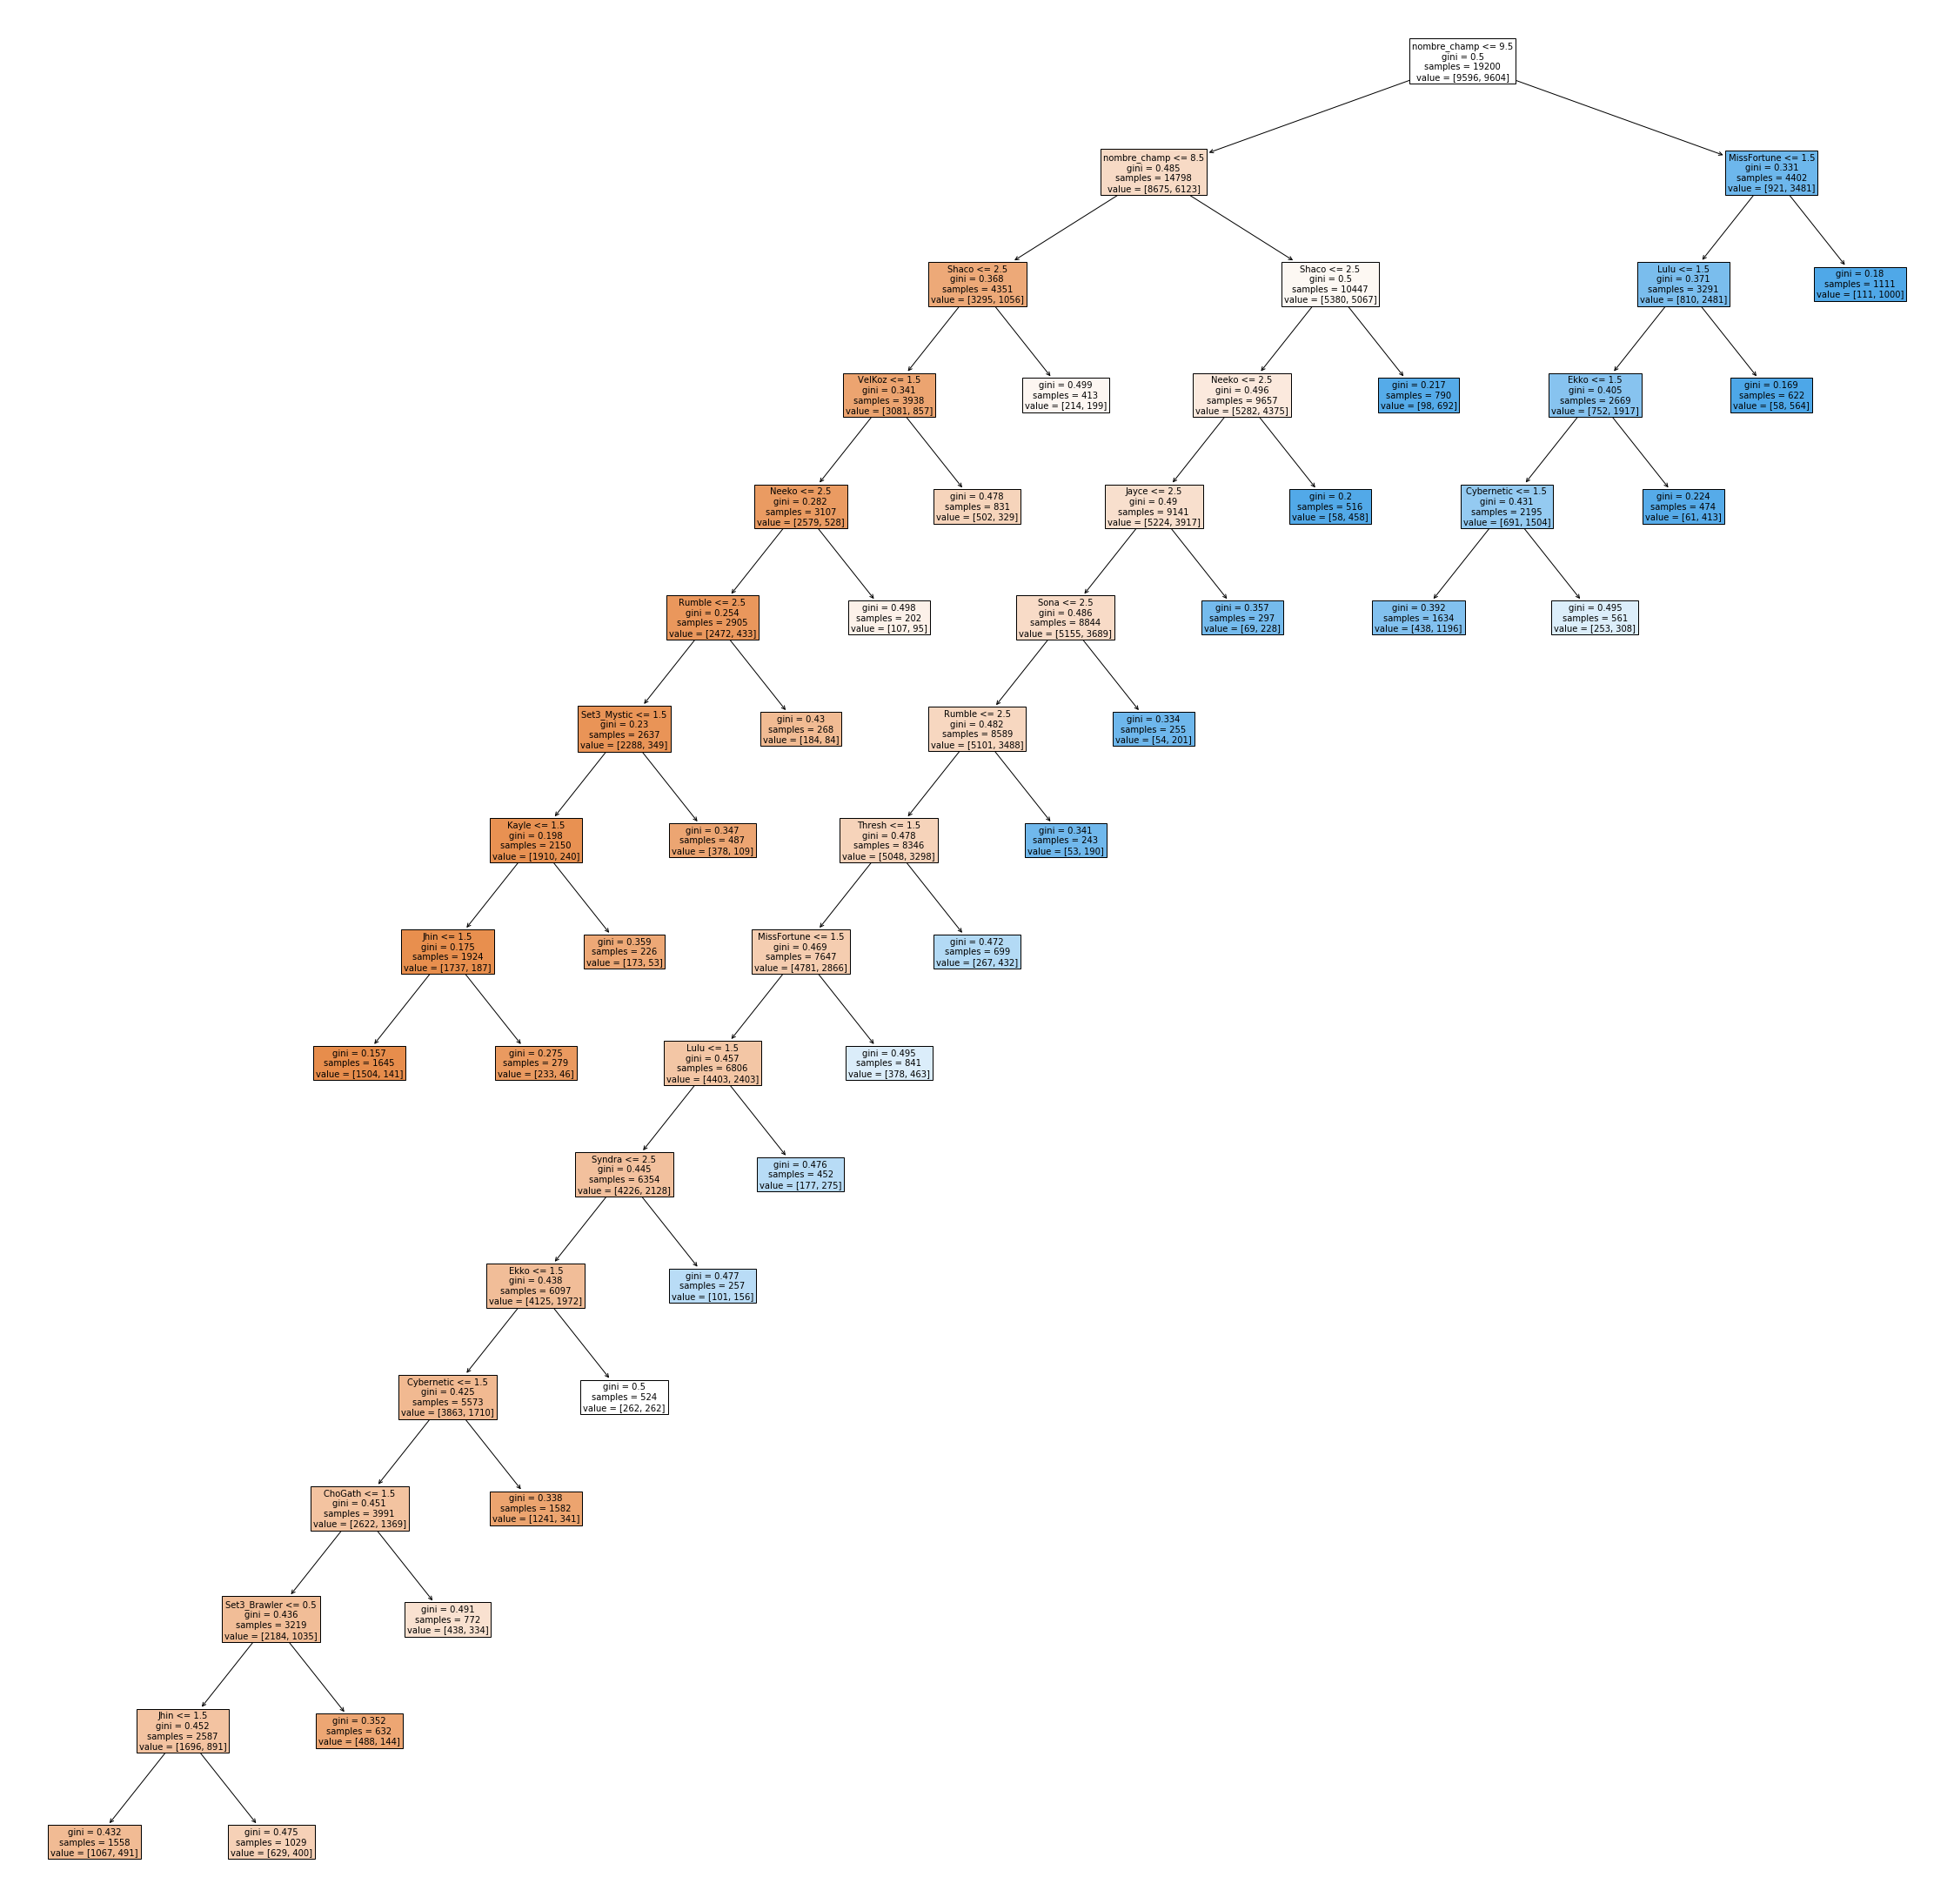

In [89]:
plt.figure(figsize=(40,40))
plot_tree(model4,feature_names = list(X_top_train.columns),filled=True,fontsize=10)
plt.show()

# Conclusion 

Jouer à TFT est une chose, le prédire en est une autre. Au cours de ce projet j'ai pu me rendre compte de la complexité de transformer l'univers d'un jeu dans un ensemble de données. L'information à disposition bien que déjà très complète ne permet pas d'expliquer tout ce que le jeu peut proposer.

Les différentes prédictions mettent en avant des phénomènes du jeu mais elles en oublient une grande partie. Beaucoup de phénomène influence le classement à l'issue d'une partie, que ce soit la synergie, les counter, les trade ou encore les erreurs de placement de ses champions. L'information à disposition reste un image de sa situation à la fin de la partie, elle omet l'impact de la strategie adverse et la capacité d'un joueur à placer son équipe sur le terrain pour rendre sa composition efficace. Toutes ses facettes du jeu sont très complexes, à mon avis, pour être prise en compte avec les données que l'on a. Cependant, j'ai quand même pris beaucoup de plaisir à appliquer les techniques de Machine Learning sur des données issues de TFT. C'est appréciable de se rendre compte de la diffculté à transformer une information que l'on percoie en une information sous forme de données. 

Dans un premier temps on s'est interessé au classement rang par rang des joueurs d'une partie. Les premières analyses ont mis en avant l'importance du round dans le classement final. Bien que propre au jeu il donne une trop grosse importance à une information directement liée au rang plutôt qu'aux stratégies des joueurs. Cette variable mise à part, la prédiction n'était pas meilleure. Elle a pourtant mis en avant un phénomène du jeu, le contexte d'une partie. Une composition d'équipe définie uniquement par le nombre d'étoile des champions et leurs objets a une puissance dans une partie si on ne compte pas l'adversité. D'une partie à l'autre, une même composition peut se retrouver mise à l'épreuve par un joueur adversaire qui utilise une équipe 'counter'. La prédiction nous a montrer que, seuls, la composition et les objets ne peut pas prédire correctement le rang.

On n'a pas réussi à predir correctement le classement, mais on a réussi à séparer le haut du tableau du bas. Les parties se jouent sur les détails, ce qui rend difficile avec l'information à disposition de prédire correctement le rang. Mais on a réussi à trouver un phénomène de TFT, celui des paliers de défaite. Souvent les joueurs terminant 8ème et 7ème finissent avec peu de round d'écart et donc leurs équipes ont des puissances similaires, de la même façons ceux aux places 4 à 6 et enfin le trio de tête. 

Pour utiliser cette observation, on a essayé de prédire le Top 4 d'une partie. On n'arrive pas à correctement prédire le classement des joueurs mais on arrive à définir si ils font partis des joueurs pouvant se classer dans le haut du tableau des autres. Ainsi on a réussi à obtenir environs 72% de taux de prédiction pour le Top 4. C'est une prédiction que j'estime bonne puisque dans 72% des prédictions ont attesté correctement qu'un joueur allait gagner des points ou non de classement dans le jeu (Top 4 permet de gagner des points pour le classement général du jeu). 

Pour terminer, je pense qu'il serait intéressant d'ajouter des variables au jeu de données et d'en transformer. On a pu voir que les variables objets des Champions n'étaient pas mises en valeur, il serait intéressant d'ajouter les statistiques que les objets procurent et d'ajouter les statistiques des Champions. On pourrait ainsi juger de la valeur sur le terrain d'une equipe. Enfin, comme j'en parlais, il serait très intéressant si cela n'apporte pas de biais de prendre en compte l'information issue des joueurs d'une même partie.